In [4]:
# All Imports

import numpy as np
#import astra
import os
import imageio
import time
import matplotlib.pyplot as plt
import random
import tqdm
from tqdm import tqdm



import numpy as np
import numba
from numba import njit, prange
from numba import cuda
import copy
import sys
import time
import matplotlib.pyplot as plt
import pydicom
import glob
from skimage import filters
from skimage.filters import unsharp_mask, threshold_local, threshold_minimum, threshold_otsu
import matplotlib.pyplot as plt
import numpy as np
import glob

from skimage.measure import compare_ssim as ssim



import numba
from numba import njit, prange


import os
import skimage.io as io
import skimage.transform as trans
import numpy as np

from skimage.measure import label
from scipy.io import loadmat
from scipy.ndimage import zoom
#from scipy.misc import imresize
import pywt

import csv
import random
import time
%matplotlib inline  

from scipy import ndimage, misc

import pywt
#import hdf5storage

import scipy.io as sio
from skimage.filters import threshold_otsu

#import pylidc as pl


import pywt
import numpy as np
#import pydicom
import matplotlib.pyplot as plt
import SimpleITK as sitk
import skimage.io as io
#from sklearn.decomposition import PCA
import collections, numpy
import warnings
from scipy import ndimage, misc
warnings.filterwarnings('ignore')

#import pymrt as mrt
#import pymrt.geometry
import ipyvolume as ipv
import copy


import os
import glob
import uuid
import numpy as np
from ipdb import set_trace as bp



#from image_gen import ImageDataGenerator
#from load_data import loadDataMontgomery, loadDataJSRT
#from build_model import build_UNet2D_4L

import pandas as pd



import numpy
import warnings
import functools
import pickle
import time

In [25]:
# All CNN Models

import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np
from torchsummary import summary

from skimage import measure

class MyUnet(nn.Module):
    def __init__(self):
        super().__init__()
        
        filter1 = 32
        filter2 = 64
        filter3 = 128
        filter4 = 256
        filter5 = 512
    
        self.dense_block = nn.Sequential(nn.Linear(1, 128),
                                         nn.LeakyReLU(),
                                         nn.Linear(128, 32),
                                         nn.LeakyReLU(),
                                         nn.Linear(32, 1),
                                         nn.LeakyReLU()
                                        )
        
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, filter1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter1, filter1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.pool1 = nn.MaxPool2d(2, stride=2)
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(filter1, filter2, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter2, filter2, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.pool2 = nn.MaxPool2d(2, stride=2)
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(filter2, filter3, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter3, filter3, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.pool3 = nn.MaxPool2d(2, stride=2)
        self.conv_block4 = nn.Sequential(
            nn.Conv2d(filter3, filter4, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter4, filter4, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.pool4 = nn.MaxPool2d(2, stride=2)
        self.conv_block5 = nn.Sequential(
            nn.Conv2d(filter4, filter5, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter5, filter5, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.pool5 = nn.MaxPool2d(2, stride=2)
        
        self.upsample1   = nn.Upsample(scale_factor=2, mode='bilinear')
        self.upsample2   = nn.Upsample(scale_factor=2, mode='bilinear')
        self.upsample3   = nn.Upsample(scale_factor=2, mode='bilinear')
        self.upsample4   = nn.Upsample(scale_factor=2, mode='bilinear')
        
        self.conv_block_merge1 = nn.Sequential(
            nn.Conv2d(filter5, filter4, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block_merge2 = nn.Sequential(
            nn.Conv2d(filter4, filter3, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block_merge3 = nn.Sequential(
            nn.Conv2d(filter3, filter2, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block_merge4 = nn.Sequential(
            nn.Conv2d(filter2, filter1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        
        
        self.conv_block6 = nn.Sequential(
            nn.Conv2d(filter5, filter4, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter4, filter4, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block7 = nn.Sequential(
            nn.Conv2d(filter4, filter3, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter3, filter3, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block8 = nn.Sequential(
            nn.Conv2d(filter3, filter2, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter2, filter2, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block9 = nn.Sequential(
            nn.Conv2d(filter2, filter1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter1, filter1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block10 = nn.Sequential(
            nn.Conv2d(filter1, 1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        
        self.d1 = nn.Dropout(0.5)
        self.d2 = nn.Dropout(0.5)
    
    def forward(self, x, y):
        hash_val = self.dense_block(y)
        hash_val = hash_val.view(-1, 1, 1, 1)
        
        x1 = self.conv_block1(x)
        x1 = torch.mul(x1, hash_val)
        p1 = self.pool1(x1)
        
        x2 = self.conv_block2(p1)
        x2 = torch.mul(x2, hash_val)
        p2 = self.pool2(x2)
        
        x3 = self.conv_block3(p2)
        x3 = torch.mul(x3, hash_val)
        p3 = self.pool3(x3)
        #p3 = self.d1(p3)
        
        x4 = self.conv_block4(p3)
        x4 = torch.mul(x4, hash_val)
        p4 = self.pool4(x4)
        #p4 = self.d2(p4)
        
        x5 = self.conv_block5(p4)
        x5 = torch.mul(x5, hash_val)
        
        
        
        u1 = self.upsample1(x5)
        m6 = self.conv_block_merge1(u1)
        m6 = torch.cat((x4, m6), 1)
        x6 = self.conv_block6(m6)
        x6 = torch.mul(x6, hash_val)
        
        u2 = self.upsample2(x6)
        m7 = self.conv_block_merge2(u2)
        m7 = torch.cat((x3, m7), 1)
        x7 = self.conv_block7(m7)
        x7 = torch.mul(x7, hash_val)
        
        u3 = self.upsample3(x7)
        m8 = self.conv_block_merge3(u3)
        m8 = torch.cat((x2, m8), 1)
        x8 = self.conv_block8(m8)
        x8 = torch.mul(x8, hash_val)
        
        u4 = self.upsample4(x8)
        m9 = self.conv_block_merge4(u4)
        m9 = torch.cat((x1, m9), 1)
        x9 = self.conv_block9(m9)
        x9 = self.conv_block10(x9)
        
        out = torch.sub(x, x9)
        
        return out

class MyUnet_half(nn.Module):
    def __init__(self):
        super().__init__()
        
        filter1 = 16
        filter2 = 32
        filter3 = 64
        filter4 = 128
        filter5 = 256
    
        self.dense_block = nn.Sequential(nn.Linear(1, 128),
                                         nn.LeakyReLU(),
                                         nn.Linear(128, 32),
                                         nn.LeakyReLU(),
                                         nn.Linear(32, 1),
                                         nn.LeakyReLU()
                                        )
        
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, filter1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter1, filter1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.pool1 = nn.MaxPool2d(2, stride=2)
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(filter1, filter2, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter2, filter2, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.pool2 = nn.MaxPool2d(2, stride=2)
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(filter2, filter3, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter3, filter3, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.pool3 = nn.MaxPool2d(2, stride=2)
        self.conv_block4 = nn.Sequential(
            nn.Conv2d(filter3, filter4, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter4, filter4, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.pool4 = nn.MaxPool2d(2, stride=2)
        self.conv_block5 = nn.Sequential(
            nn.Conv2d(filter4, filter5, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter5, filter5, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.pool5 = nn.MaxPool2d(2, stride=2)
        
        self.upsample1   = nn.Upsample(scale_factor=2, mode='bilinear')
        self.upsample2   = nn.Upsample(scale_factor=2, mode='bilinear')
        self.upsample3   = nn.Upsample(scale_factor=2, mode='bilinear')
        self.upsample4   = nn.Upsample(scale_factor=2, mode='bilinear')
        
        self.conv_block_merge1 = nn.Sequential(
            nn.Conv2d(filter5, filter4, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block_merge2 = nn.Sequential(
            nn.Conv2d(filter4, filter3, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block_merge3 = nn.Sequential(
            nn.Conv2d(filter3, filter2, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block_merge4 = nn.Sequential(
            nn.Conv2d(filter2, filter1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        
        
        self.conv_block6 = nn.Sequential(
            nn.Conv2d(filter5, filter4, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter4, filter4, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block7 = nn.Sequential(
            nn.Conv2d(filter4, filter3, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter3, filter3, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block8 = nn.Sequential(
            nn.Conv2d(filter3, filter2, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter2, filter2, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block9 = nn.Sequential(
            nn.Conv2d(filter2, filter1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(filter1, filter1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        self.conv_block10 = nn.Sequential(
            nn.Conv2d(filter1, 1, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2))
        
        self.d1 = nn.Dropout(0.5)
        self.d2 = nn.Dropout(0.5)
        
    def forward(self, x, y):
        hash_val = self.dense_block(y)
        hash_val = hash_val.view(-1, 1, 1, 1)
        
        x1 = self.conv_block1(x)
        x1 = torch.mul(x1, hash_val)
        p1 = self.pool1(x1)
        
        x2 = self.conv_block2(p1)
        x2 = torch.mul(x2, hash_val)
        p2 = self.pool2(x2)
        
        x3 = self.conv_block3(p2)
        x3 = torch.mul(x3, hash_val)
        p3 = self.pool3(x3)
        #p3 = self.d1(p3)
        
        x4 = self.conv_block4(p3)
        x4 = torch.mul(x4, hash_val)
        p4 = self.pool4(x4)
        #p4 = self.d2(p4)
        
        x5 = self.conv_block5(p4)
        x5 = torch.mul(x5, hash_val)
        
        
        
        u1 = self.upsample1(x5)
        m6 = self.conv_block_merge1(u1)
        m6 = torch.cat((x4, m6), 1)
        x6 = self.conv_block6(m6)
        x6 = torch.mul(x6, hash_val)
        
        u2 = self.upsample2(x6)
        m7 = self.conv_block_merge2(u2)
        m7 = torch.cat((x3, m7), 1)
        x7 = self.conv_block7(m7)
        x7 = torch.mul(x7, hash_val)
        
        u3 = self.upsample3(x7)
        m8 = self.conv_block_merge3(u3)
        m8 = torch.cat((x2, m8), 1)
        x8 = self.conv_block8(m8)
        x8 = torch.mul(x8, hash_val)
        
        u4 = self.upsample4(x8)
        m9 = self.conv_block_merge4(u4)
        m9 = torch.cat((x1, m9), 1)
        x9 = self.conv_block9(m9)
        x9 = self.conv_block10(x9)
        
        out = torch.sub(x, x9)
        
        return out
    
print(np.arange(10))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# [STAR] Code to get the patches for Walnut dataset

import numpy as np

train_list = np.arange(1, 29)#[1, 3, 6, 7, 11, 12, 13, 16, 17, 31, 33, 35, 37, 39, 41, 43, 50, 52, 55,  68, 69, 70, 71, 72, 73, 76]
val_list   = np.arange(30, 34)#[19, 21, 23, 25, 27, 29, 61, 62, 64, 65]
test_list  = np.arange(35, 43)#[10, 44, 45, 47, 54, 58, 59, 60, 66, 67, 74, 75]

algorithm = 'quadratic'

all_list = np.concatenate([train_list, val_list, test_list])

for i in range(1, 43):
    if i not in all_list:
        continue
    
    #todo = [15, 16, 19, 20, 27, 29, 31, 35]
    #allfiles = glob.glob("/media/drilnvm/ubuntudata2/REAL-DBT-PROJECTIONS/RECONS/*_"+str(i)+".raw")
    allfiles = glob.glob("/media/pranjal/newdrive1/WalnutDataRecon/"+str(i)+"_*_"+algorithm+".npy")
    allfiles.sort(key=lambda x: float(x.split('/')[-1].split('_')[1]), reverse=False)
    
    print('Files are ')
    for p in allfiles:
        print(p)
    
    mainfile = allfiles[0]#glob.glob("/media/drilnvm/ubuntudata2/REAL-DBT-PROJECTIONS/RECONS-LINEAR/*_"+str(i)+".raw")[0]
    
    all_vols   = np.zeros([len(allfiles), 251, 251, 251], dtype='float16')
    all_index  = []
    all_values = []
    all_values_z = []
    
    #temp = np.fromfile(mainfile, dtype='float32')
    #temp = np.reshape(temp, [40, 1200, 3000])
    #all_vols[0, :, :, :] = temp
    #all_index.append(i)
    #all_values.append(-0)
    
    counter = 0
    for f in allfiles:
        a     = np.load(f)
        all_vols[counter, :, :, :] = a
        value = float(f.split("/")[-1].split("_")[1])
        all_values.append(value)
        
        print(value, a.shape, f)
        counter = counter+1
    
    total_count   = 25
    all_locations = []
    total_values  = []
    
    x_array      = np.zeros([total_count*(len(all_vols)-1), 1, 256, 256], dtype='float16')
    y_array      = np.zeros([total_count*(len(all_vols)-1), 1, 256, 256], dtype='float16')
    v_array      = np.zeros([total_count*(len(all_vols)-1), 1], dtype='float32')
    m_array      = np.zeros([total_count*(len(all_vols)-1), 1, 256, 256], dtype='float16')
    
    
    # Get slices
    counter = 0
    for kp in range(total_count):
        while(True):
            try:
                ix        = np.random.randint(50, 251-50)
                tempx     = all_vols[0][:, ix, :]
                
#                 temp            = tempx.astype('float32')
#                 temp            = filters.gaussian(temp, sigma=5)
#                 thresh_min      = threshold_otsu(temp)#threshold_minimum(temp)
#                 binary_adaptive = temp > thresh_min
#                 binary_adaptive = ndimage.binary_fill_holes(binary_adaptive).astype('uint8')
#                 tempx            = np.multiply(tempx, binary_adaptive)
            except:
                continue
            break
        
        for k in range(1, len(all_vols)):
            tempy            = all_vols[k][:, ix, :]
            tempy            = tempy#np.multiply(tempy, binary_adaptive)

            x_array[counter, 0, 3:-2, 3:-2] = tempx
            y_array[counter, 0, 3:-2, 3:-2] = tempy
            m_array[counter, 0, 3:-2, 3:-2] = binary_adaptive.astype('float16')
            v_array[counter, 0]             = all_values[k]

            counter = counter+1
    
    x_array = x_array[:counter]
    y_array = y_array[:counter]
    v_array = v_array[:counter]
    
    np.save("/media/pranjal/newdrive1/WalnutDataReconPatches/v-array-"+str(i)+'-'+algorithm+'.npy', v_array)
    np.save("/media/pranjal/newdrive1/WalnutDataReconPatches/x-array-"+str(i)+'-'+algorithm+'.npy', x_array)
    np.save("/media/pranjal/newdrive1/WalnutDataReconPatches/y-array-"+str(i)+'-'+algorithm+'.npy', y_array)
    np.save("/media/pranjal/newdrive1/WalnutDataReconPatches/m-array-"+str(i)+'-'+algorithm+'.npy', m_array)
    

(100, 1, 256, 256) (100, 1, 256, 256) (100, 1) (100, 1, 256, 256)
[0.0055]


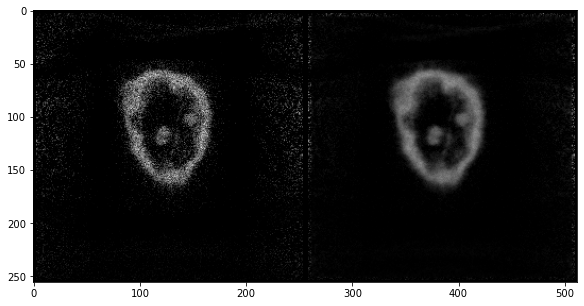

In [14]:
# For plotting the results

algorithm = 'quadratic'

if 1:
    index = random.randint(1, 42)
    x = np.load('/media/yu-hao/WindowsData/WalnutDataReconPatches/x-array-'+str(index)+'-'+algorithm+'.npy')
    m = np.load('/media/yu-hao/WindowsData/WalnutDataReconPatches/m-array-'+str(index)+'-'+algorithm+'.npy')
    y = np.load('/media/yu-hao/WindowsData/WalnutDataReconPatches/y-array-'+str(index)+'-'+algorithm+'.npy')
    v = np.load('/media/yu-hao/WindowsData/WalnutDataReconPatches/v-array-'+str(index)+'-'+algorithm+'.npy')

print(x.shape, y.shape, v.shape, m.shape)

plt.figure(figsize=(20, 5))
index = random.randint(0, x.shape[0]-1)
plt.imshow(np.concatenate([x[index, 0], y[index, 0]], axis=-1).astype('float32'), cmap='gray')
print(v[index])

#plt.imshow(np.concatenate([x[index*5, 0], y[index*5, 0], y[index*5+1, 0], y[index*5+2, 0], y[index*5+3, 0]], axis=-1).astype('float32'), cmap='gray')
#print(v[index*5:index*5+5].flatten())

In [139]:
# Reconstruction Code for a given Walnut Case

# select the ID of the sample you want to reconstruct
walnut_id = 1
# select also the orbit you want to reconstruct the data from:
# 1 higher source position, 2 middle source position, 3 lower source position
orbit_id = 2
# define a sub-sampling factor in angular direction
# (all reference reconstructions are computed with full angular resolution)
angluar_sub_sampling = 10
# select of voxels per mm in one direction (higher = larger res)
# (all reference reconstructions are computed with 10)
voxel_per_mm = 5

# we enter here some intrinsic details of the dataset needed for our reconstruction scripts
# set the variable "data_path" to the path where the dataset is stored on your own workstation
data_path = '/media/pranjal/newdrive1/Walnuts/'
# set the variable "recon_path" to the path where you would like to store the
# reconstructions you compute
recon_path = '/media/pranjal/newdrive1/Walnut_recons/'

t = time.time();
print('load data', flush=True)

# we add the info about walnut and orbit ID
data_path_full = os.path.join(data_path, 'Walnut{}'.format(walnut_id), 'Projections', 'tubeV{}'.format(orbit_id))
projs_name = 'scan_{:06}.tif'
dark_name = 'di000000.tif'
flat_name = ['io000000.tif', 'io000001.tif']
vecs_name = 'scan_geom_corrected.geom'
projs_rows = 972
projs_cols = 768

# load the numpy array describing the scan geometry from file
vecs = np.loadtxt(os.path.join(data_path_full, vecs_name))
# get the positions we need; there are in fact 1201, but the last and first one come from the same angle
vecs       = vecs[range(0,1200, angluar_sub_sampling)]
# projection file indices, we need to read in the projection in reverse order due to the portrait mode acquision 
projs_idx  = range(1199,-1, -angluar_sub_sampling)

n_pro = vecs.shape[0]

# create the numpy array which will receive projection data from tiff files
projs = np.zeros((n_pro, projs_rows, projs_cols), dtype=np.float32)

# transformation to apply to each image, we need to get the image from
# the way the scanner reads it out into to way described in the projection
# geometry
trafo = lambda image : np.transpose(np.flipud(image))

# load flat-field and dark-fields
# there are two flat-field images (taken before and after acquisition), we simply average them
dark = trafo(imageio.imread(os.path.join(data_path_full, dark_name)))
flat = np.zeros((2, projs_rows, projs_cols), dtype=np.float32)

for i, fn in enumerate(flat_name):
    flat[i] = trafo(imageio.imread(os.path.join(data_path_full, fn)))
flat =  np.mean(flat,axis=0)

# load projection data
for i in range(n_pro):
    projs[i] = trafo(imageio.imread(os.path.join(data_path_full, projs_name.format(projs_idx[i]))))

print(np.round_(time.time() - t, 3), 'sec elapsed')

### pre-process data ###########################################################

t = time.time();
print('pre-process data', flush=True)
# subtract the dark field, divide by the flat field, and take the negative log to linearize the data according to the Beer-Lambert law
projs -= dark
projs /= (flat - dark)
np.log(projs, out=projs)
np.negative(projs, out=projs)
# permute data to ASTRA convention
projs = np.transpose(projs, (1,0,2))
projs = np.ascontiguousarray(projs)
print(np.round_(time.time() - t, 3), 'sec elapsed')

# [STAR] Testing GroundTruthReconstruction.py
import NesterovGradient

orbits_to_recon = [1,2,3]

#### load and pre-process data #################################################

t = time.time();
print('load and pre-process data', flush=True)

# we add the info about walnut
data_path_full = os.path.join(data_path, 'Walnut{}'.format(walnut_id), 'Projections')

projs_name = 'scan_{:06}.tif'
dark_name  = 'di000000.tif'
flat_name  = ['io000000.tif', 'io000001.tif']
vecs_name  = 'scan_geom_corrected.geom'
projs_rows = 972
projs_cols = 768

# Create the numpy array which will receive projection data from tiff files
projs = np.zeros((projs_rows, 0, projs_cols), dtype=np.float32)

# And create the numpy array receiving the motor positions read from the geometry file
vecs           = np.zeros((0, 12), dtype=np.float32)
nb_projs_orbit = len(range(0,1200, angluar_sub_sampling))
# projection file indices, we need to read in the projection in reverse order due to the portrait mode acquision 
projs_idx      = range(1199,-1, -angluar_sub_sampling)

# transformation to apply to each image, we need to get the image from
# the way the scanner reads it out into to way described in the projection
# geometry
trafo = lambda image : np.transpose(np.flipud(image))

# Loop over the subset of orbits we want to load at the same time
for orbit_id in orbits_to_recon:
    orbit_data_path = os.path.join(data_path_full, 'tubeV{}'.format(orbit_id))


    # load the numpy array describing the scan geometry of the orbit from file
    vecs_orbit = np.loadtxt(os.path.join(orbit_data_path, vecs_name))
    
    # get the positions we need; there are in fact 1201, but the last and first one come from the same angle
    vecs = np.concatenate((vecs, vecs_orbit[range(0,1200, angluar_sub_sampling)]), axis=0)

    # load flat-field and dark-fields
    # there are two flat-field images (taken before and after acquisition), we simply average them
    dark = trafo(imageio.imread(os.path.join(orbit_data_path, dark_name)))
    flat = np.zeros((2, projs_rows, projs_cols), dtype=np.float32)
    for i, fn in enumerate(flat_name):
        flat[i] = trafo(imageio.imread(os.path.join(orbit_data_path, fn)))
    flat =  np.mean(flat,axis=0)

    # load projection data directly on the big projection array
    projs_orbit = np.zeros((nb_projs_orbit, projs_rows, projs_cols), dtype=np.float32)
    for i in range(nb_projs_orbit):
        projs_orbit[i] = trafo(imageio.imread(os.path.join(orbit_data_path, projs_name.format(projs_idx[i]))))

    # subtract the dark field, devide by the flat field, and take the negative log to linearize the data according to the Beer-Lambert law
    projs_orbit -= dark
    projs_orbit /= (flat - dark)
    
    projs_orbit_temp = np.random.poisson(projs_orbit)#projs_orbit + noise
    projs_orbit      = projs_orbit + projs_orbit_temp/10
    projs_orbit[projs_orbit == 0] = 1
    projs_orbit[projs_orbit > 1]  = 1
    projs_orbit = projs_orbit.astype('float32')
    
    # take negative log
    np.log(projs_orbit, out=projs_orbit)
    np.negative(projs_orbit, out=projs_orbit)
    # permute data to ASTRA convention
    projs_orbit = np.transpose(projs_orbit, (1,0,2))

    # attach to projs
    projs = np.concatenate((projs, projs_orbit), axis=1)
    del projs_orbit

    
from skimage.util import random_noise

# for k in range(360):
#     p     = projs[:, k, :]
#     noise = random_noise(p, mode="poisson")
#     #noise = np.random.poisson(p)
#     #noise = np.random.normal(0, 0.1, p.shape)
#     p     = p + noise
#     projs[:, k, :] = p
projs = np.ascontiguousarray(projs)

print(np.round_(time.time() - t, 3), 'sec elapsed')



# ### compute iterative reconstruction ###########################################

# t = time.time();
# print('compute reconstruction:', flush=True)

# # size of the reconstruction volume in voxels
# vol_sz  = 3*(50 * voxel_per_mm + 1,)
# # size of a cubic voxel in mm
# vox_sz  = 1/voxel_per_mm
# # numpy array holding the reconstruction volume
# vol_rec = np.zeros(vol_sz, dtype=np.float32)

# # we need to specify the details of the reconstruction space to ASTRA
# # this is done by a "volume geometry" type of structure, in the form of a Python dictionary
# # by default, ASTRA assumes a voxel size of 1, we need to scale the reconstruction space here by the actual voxel size
# vol_geom = astra.create_vol_geom(vol_sz)
# vol_geom['option']['WindowMinX'] = vol_geom['option']['WindowMinX'] * vox_sz
# vol_geom['option']['WindowMaxX'] = vol_geom['option']['WindowMaxX'] * vox_sz
# vol_geom['option']['WindowMinY'] = vol_geom['option']['WindowMinY'] * vox_sz
# vol_geom['option']['WindowMaxY'] = vol_geom['option']['WindowMaxY'] * vox_sz
# vol_geom['option']['WindowMinZ'] = vol_geom['option']['WindowMinZ'] * vox_sz
# vol_geom['option']['WindowMaxZ'] = vol_geom['option']['WindowMaxZ'] * vox_sz

# # we need to specify the details of the projection space to ASTRA
# # this is done by a "projection geometry" type of structure, in the form of a Python dictionary
# proj_geom = astra.create_proj_geom('cone_vec', projs_rows, projs_cols, vecs)

# # register both volume and projection geometries and arrays to ASTRA
# vol_id       = astra.data3d.link('-vol', vol_geom, vol_rec)
# proj_id      = astra.data3d.link('-sino', proj_geom, projs)
# projector_id = astra.create_projector('cuda3d', proj_geom, vol_geom)

# ## finally, create an ASTRA configuration.
# ## this configuration dictionary setups an algorithm, a projection and a volume
# ## geometry and returns a ASTRA algorithm, which can be run on its own
# astra.plugin.register(NesterovGradient.AcceleratedGradientPlugin)
# cfg_agd                         = astra.astra_dict('AGD-PLUGIN')
# cfg_agd['ProjectionDataId']     = proj_id
# cfg_agd['ReconstructionDataId'] = vol_id
# cfg_agd['ProjectorId']          = projector_id
# cfg_agd['option']               = {}
# cfg_agd['option']['MinConstraint'] = 0
# alg_id = astra.algorithm.create(cfg_agd)

# # Run Nesterov Accelerated Gradient Descent algorithm with 'nb_iter' iterations
# nb_iter = 50
# astra.algorithm.run(alg_id, nb_iter)

# # release memory allocated by ASTRA structures
# astra.algorithm.delete(alg_id)
# astra.data3d.delete(proj_id)
# astra.data3d.delete(vol_id)

# print(np.round_(time.time() - t, 3), 'sec elapsed')



# ### plot and save reconstruction ##############################################

# t = time.time();
# print('save results', flush=True)

# # low level plotting
# f, ax = plt.subplots(1, 3, sharex=False, sharey=False)
# ax[0].imshow(vol_rec[vol_sz[0]//2,:,:])
# ax[1].imshow(vol_rec[:,vol_sz[1]//2,:])
# ax[2].imshow(vol_rec[:,:,vol_sz[2]//2])
# f.tight_layout()

# # construct full path for storing the results
# recon_path_full = os.path.join(recon_path, 'Walnut{}'.format(walnut_id))

# # create the directory in case it doesn't exist yet
# if not os.path.exists(recon_path_full):
#     os.makedirs(recon_path_full)

# # Save every slice in  the volume as a separate tiff file
# orbit_str = 'pos'
# for orbit_id in orbits_to_recon:
#     orbit_str = orbit_str + '{}'.format(orbit_id)
    
# for i in range(vol_sz[0]):
#     slice_path = os.path.join(recon_path_full, 'nnls_' + orbit_str + '_iter{}_ass{}_vmm{}_{:06}.tiff'.format(nb_iter,
#                                   angluar_sub_sampling, voxel_per_mm, i))
#     imageio.imwrite(slice_path, vol_rec[i,...])

# print(np.round_(time.time() - t, 3), 'sec elapsed')


load data
0.23 sec elapsed
pre-process data
2.734 sec elapsed
load and pre-process data
21.773 sec elapsed


In [28]:
# [STAR] For reading the training data for Quadratic Algorithm

import glob
import numpy as np

train_list = np.arange(1, 29)#[1, 3, 6, 7, 11, 12, 13, 16, 17, 31, 33, 35, 37, 39, 41, 43, 50, 52, 55,  68, 69, 70, 71, 72, 73, 76]
val_list   = np.arange(30, 34)#[19, 21, 23, 25, 27, 29, 61, 62, 64, 65]
test_list  = np.arange(35, 43)

train_size = len(train_list)*200
x_array = np.zeros([train_size, 1, 256, 256], dtype='float16')
v_array = np.zeros([train_size, 1], dtype='float32')
y_array = np.zeros([train_size, 1, 256, 256], dtype='float16')

val_size = len(val_list)*200
x_val_array = np.zeros([val_size, 1, 256, 256], dtype='float16')
v_val_array = np.zeros([val_size, 1], dtype='float32')
y_val_array = np.zeros([val_size, 1, 256, 256], dtype='float16')

patches_path = '/media/yu-hao/WindowsData/WalnutDataReconPatches/'
count        = 0
algorithm    = 'huber'

for t in train_list:
    x = np.load(patches_path+'x-array-'+str(t)+'-'+algorithm+'.npy')
    y = np.load(patches_path+'y-array-'+str(t)+'-'+algorithm+'.npy')
    v = np.load(patches_path+'v-array-'+str(t)+'-'+algorithm+'.npy')
    
    y_array[count: count+x.shape[0], :, :, :] = y
    x_array[count: count+x.shape[0], :, :, :] = x
    v_array[count: count+x.shape[0], :]       = v
    count = count+x.shape[0]
    #print(t, v.shape)

x_array = x_array[:count]
y_array = y_array[:count]
v_array = v_array[:count]
print(x_array.shape, y_array.shape, v_array.shape, count)

count = 0
for t in val_list:
    x = np.load(patches_path+'x-array-'+str(t)+'-'+algorithm+'.npy')
    y = np.load(patches_path+'y-array-'+str(t)+'-'+algorithm+'.npy')
    v = np.load(patches_path+'v-array-'+str(t)+'-'+algorithm+'.npy')
    
    y_val_array[count: count+x.shape[0], :, :, :] = y
    x_val_array[count: count+x.shape[0], :, :, :] = x
    v_val_array[count: count+x.shape[0], :]       = v
    count = count+x.shape[0]

x_val_array = x_val_array[:count]
y_val_array = y_val_array[:count]
v_val_array = v_val_array[:count]
print(x_val_array.shape, y_val_array.shape, v_val_array.shape, count)


(5560, 1, 256, 256) (5560, 1, 256, 256) (5560, 1) 5560
(800, 1, 256, 256) (800, 1, 256, 256) (800, 1) 800


In [ ]:
# [STAR] For reading the training data for Huber Algorithm

import glob
import numpy as np

train_list = np.arange(1, 29)#[1, 3, 6, 7, 11, 12, 13, 16, 17, 31, 33, 35, 37, 39, 41, 43, 50, 52, 55,  68, 69, 70, 71, 72, 73, 76]
val_list   = np.arange(30, 34)#[19, 21, 23, 25, 27, 29, 61, 62, 64, 65]
test_list  = np.arange(35, 43)

train_size = len(train_list)*125
x_array = np.zeros([train_size, 1, 256, 256], dtype='float16')
v_array = np.zeros([train_size, 1], dtype='float32')
y_array = np.zeros([train_size, 1, 256, 256], dtype='float16')

val_size = len(val_list)*125
x_val_array = np.zeros([val_size, 1, 256, 256], dtype='float16')
v_val_array = np.zeros([val_size, 1], dtype='float32')
y_val_array = np.zeros([val_size, 1, 256, 256], dtype='float16')

patches_path = '/media/pranjal/newdrive1/WalnutDataReconPatches/'
count        = 0

for t in train_list:
    x = np.load(patches_path+'x-array-'+str(t)+'.npy')
    y = np.load(patches_path+'y-array-'+str(t)+'.npy')
    v = np.load(patches_path+'v-array-'+str(t)+'.npy')
    
    y_array[count: count+x.shape[0], :, :, :] = y
    x_array[count: count+x.shape[0], :, :, :] = x
    v_array[count: count+x.shape[0], :]       = v
    count = count+x.shape[0]
    #print(t, v.shape)

x_array = x_array[:count]
y_array = y_array[:count]
v_array = v_array[:count]
print(x_array.shape, y_array.shape, v_array.shape, count)

count = 0
for t in val_list:
    x = np.load(patches_path+'x-array-'+str(t)+'.npy')
    y = np.load(patches_path+'y-array-'+str(t)+'.npy')
    v = np.load(patches_path+'v-array-'+str(t)+'.npy')
    
    y_val_array[count: count+x.shape[0], :, :, :] = y
    x_val_array[count: count+x.shape[0], :, :, :] = x
    v_val_array[count: count+x.shape[0], :]       = v
    count = count+x.shape[0]

x_val_array = x_val_array[:count]
y_val_array = y_val_array[:count]
v_val_array = v_val_array[:count]
print(x_val_array.shape, y_val_array.shape, v_val_array.shape, count)


In [ ]:
# [STAR] For training the Pytorch Model for Imitating the result with volume Slice Huber

import torch
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
from math import exp

def gaussian(window_size, sigma):
    gauss = torch.Tensor([exp(-(x - window_size//2)**2/float(2*sigma**2)) for x in range(window_size)])
    return gauss/gauss.sum()

def create_window(window_size, channel):
    _1D_window = gaussian(window_size, 1.5).unsqueeze(1)
    _2D_window = _1D_window.mm(_1D_window.t()).float().unsqueeze(0).unsqueeze(0)
    window = Variable(_2D_window.expand(channel, 1, window_size, window_size).contiguous())
    return window

def _ssim(img1, img2, window, window_size, channel, size_average = True):
    mu1 = F.conv2d(img1, window, padding = window_size//2, groups = channel)
    mu2 = F.conv2d(img2, window, padding = window_size//2, groups = channel)

    mu1_sq = mu1.pow(2)
    mu2_sq = mu2.pow(2)
    mu1_mu2 = mu1*mu2

    sigma1_sq = F.conv2d(img1*img1, window, padding = window_size//2, groups = channel) - mu1_sq
    sigma2_sq = F.conv2d(img2*img2, window, padding = window_size//2, groups = channel) - mu2_sq
    sigma12 = F.conv2d(img1*img2, window, padding = window_size//2, groups = channel) - mu1_mu2

    C1 = 0.01**2
    C2 = 0.03**2

    ssim_map = ((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*(sigma1_sq + sigma2_sq + C2))

    if size_average:
        return ssim_map.mean()
    else:
        return ssim_map.mean(1).mean(1).mean(1)

class SSIM(torch.nn.Module):
    def __init__(self, window_size = 11, size_average = True):
        super(SSIM, self).__init__()
        self.window_size = window_size
        self.size_average = size_average
        self.channel = 1
        self.window = create_window(window_size, self.channel)

    def forward(self, img1, img2):
        (_, channel, _, _) = img1.size()

        if channel == self.channel and self.window.data.type() == img1.data.type():
            window = self.window
        else:
            window = create_window(self.window_size, channel)
            
            if img1.is_cuda:
                window = window.cuda(img1.get_device())
            window = window.type_as(img1)
            
            self.window = window
            self.channel = channel


        return _ssim(img1, img2, window, self.window_size, channel, self.size_average)

def ssim(img1, img2, window_size = 11, size_average = True):
    (_, channel, _, _) = img1.size()
    window = create_window(window_size, channel)
    
    if img1.is_cuda:
        window = window.cuda(img1.get_device())
    window = window.type_as(img1)
    
    return _ssim(img1, img2, window, window_size, channel, size_average)

import torch.optim as optim
from skimage import measure
#import pytorch_msssim


def get_ssim(pred, ground):
    ssim_array = []
    
    for i in range(pred.shape[0]):
        t1 = np.min(ground[i].flatten())
        t2 = np.max(ground[i].flatten())
        reference_image = (ground[i, 0]-t1)*255/(t2-t1)
        
        t1 = np.min(pred[i, 0, :, :].flatten())
        t2 = np.max(pred[i, 0, :, :].flatten())
        distorted_image = (pred[i, 0]-t1)*255/(t2-t1)
        
        ssim_temp = measure.compare_ssim(distorted_image, reference_image, data_range=255)
        ssim_array.append(ssim_temp)
    
    return ssim_array

def get_ssim_distribution(ssim_input_array, value_array):
    #print(ssim_input_array)
    #value_array.sort()
    #print(value_array)
    
    ssim_array = {}
    ssim_array[0.01] = []
    ssim_array[0.02] = []
    ssim_array[0.03] = []
    ssim_array[0.04] = []
    ssim_array[0.05] = []
    
    for i in range(len(value_array)):
        value     = value_array[i][0]
        ssim_temp = ssim_input_array[i]
        #if value < 0.01:
        #    print('test it pranjal ', value, ssim_temp)
        if value < 0.01:
            ssim_array[0.01].append(ssim_temp)
            #mae_array[0.1].append(mae_temp)
        elif value < 0.02:
            ssim_array[0.02].append(ssim_temp)
            #mae_array[0.2].append(mae_temp)    
        elif  value < 0.03:
            ssim_array[0.03].append(ssim_temp)
            #mae_array[0.3].append(mae_temp)    
        elif  value < 0.04:
            ssim_array[0.04].append(ssim_temp)
            #mae_array[0.4].append(mae_temp)    
        elif value < 0.05:
            ssim_array[0.05].append(ssim_temp)
            #mae_array[0.5].append(mae_temp)  
    
    mean_ssim_array = []
    for k in ssim_array.keys():
        mean_ssim_array.append(np.mean(ssim_array[k]))
    mean_ssim_array = [str(round(x, 5)) for x in mean_ssim_array]
    
    return ", ".join(mean_ssim_array)

model = MyUnet_half()
model.cuda()


device    = torch.device("cuda:0")
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.L1Loss()
mse_criterion  = nn.MSELoss()

def my_loss(output, target):
    loss = torch.mean(torch.abs((output - target)))
    return loss

my_loss1 = SSIM()
#MSSSIM()

prev_min   = 1000
batch_size = 8

#model.train()
for epoch in range(1000):
    model.train()
    loss_array = []
    ssim_array = []
    value_array  = []
    
    idx     = np.random.permutation(len(x_array))
    x_array = x_array[idx]
    y_array = y_array[idx]
    v_array = v_array[idx]
    
    for i in range(len(x_array)//batch_size):
        x = x_array[i*batch_size:(i+1)*batch_size, :, :, :]
        y = y_array[i*batch_size:(i+1)*batch_size, :, :, :]
        v = v_array[i*batch_size:(i+1)*batch_size, :]
        v1 = v
        #print(x.shape, y.shape, z.shape)
        
        x = torch.tensor(x, device=device).float()
        y = torch.tensor(y, device=device).float()
        v = torch.tensor(v, device=device).float()
        v2 = v
        optimizer.zero_grad()
        output = model(x, v)
        #print(output.shape)
        #break
        #print(x.data.shape, output.data.shape)
        
        loss1  = -my_loss1(output, y)
        loss2  =  my_loss(output, y)
        
        loss   = loss2#+loss2
        
        output = output.data.cpu().numpy()
        y      = y.data.cpu().numpy()
        v      = v.data.cpu().numpy()
        v3 = v
        #print(output.shape, y.shape)
        ssim_values = get_ssim(output, y)
        
        #print(v1.flatten())
        #print(v2.flatten())
        #print(v3.flatten())
        
        #if i % 100 == 0:
        #    print(i, loss.data.shape, loss.item())
        for vt in ssim_values:
            ssim_array.append(vt)
        for ik, vt in enumerate(v):
            #if vt[0] < 0.01:
            #    print(vt[0], 'a', v1[ik], v2[ik], v3[ik])
            value_array.append(vt)
        
        loss_array.append(loss.item())
        
        #print(loss.item())
        #optim.zero_grad()
        
        loss.backward()
        optimizer.step()
    
    #print(value_array)
    ssim_string = get_ssim_distribution(ssim_array, value_array)
    
    print('Loss ', np.mean(loss_array), ' SSIM ', ssim_string)
    
    
    model.eval()
    loss_array = []
    ssim_array = []
    value_array  = []
    
    for i in range(len(x_val_array)//batch_size):
        x = x_val_array[i*batch_size:(i+1)*batch_size, :, :, :]
        y = y_val_array[i*batch_size:(i+1)*batch_size, :, :, :]
        v = v_val_array[i*batch_size:(i+1)*batch_size, :]

        x = torch.tensor(x, device=device).float()
        y = torch.tensor(y, device=device).float()
        v = torch.tensor(v, device=device).float()

        output = model(x, v)

        loss1 = -my_loss1(output, y)
        loss2 = my_loss(output, y)
        loss  = loss2#+loss2
        
        output = output.data.cpu().numpy()
        y      = y.data.cpu().numpy()
        v      = v.data.cpu().numpy()
        
        ssim_values = get_ssim(output, y)
        
        for vt in ssim_values:
            ssim_array.append(vt)
        for vt in v:
            value_array.append(vt)
        
        loss_array.append(loss.item())
    
    
    ssim_string = get_ssim_distribution(ssim_array, value_array)
        
    val_loss = np.mean(loss_array)
    print("Val loss ", val_loss, ' SSIM ', ssim_string)
    
    if val_loss < prev_min:
        prev_min = val_loss
        print('saving the model ', prev_min)
        torch.save(model.state_dict(), "unethalf-quadtraic-walnut.pt")

In [ ]:
# [STAR] For training the Pytorch Model for Imitating the result with volume Slice Quadratic

import torch
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
from math import exp

def gaussian(window_size, sigma):
    gauss = torch.Tensor([exp(-(x - window_size//2)**2/float(2*sigma**2)) for x in range(window_size)])
    return gauss/gauss.sum()

def create_window(window_size, channel):
    _1D_window = gaussian(window_size, 1.5).unsqueeze(1)
    _2D_window = _1D_window.mm(_1D_window.t()).float().unsqueeze(0).unsqueeze(0)
    window = Variable(_2D_window.expand(channel, 1, window_size, window_size).contiguous())
    return window

def _ssim(img1, img2, window, window_size, channel, size_average = True):
    mu1 = F.conv2d(img1, window, padding = window_size//2, groups = channel)
    mu2 = F.conv2d(img2, window, padding = window_size//2, groups = channel)

    mu1_sq = mu1.pow(2)
    mu2_sq = mu2.pow(2)
    mu1_mu2 = mu1*mu2

    sigma1_sq = F.conv2d(img1*img1, window, padding = window_size//2, groups = channel) - mu1_sq
    sigma2_sq = F.conv2d(img2*img2, window, padding = window_size//2, groups = channel) - mu2_sq
    sigma12 = F.conv2d(img1*img2, window, padding = window_size//2, groups = channel) - mu1_mu2

    C1 = 0.01**2
    C2 = 0.03**2

    ssim_map = ((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*(sigma1_sq + sigma2_sq + C2))

    if size_average:
        return ssim_map.mean()
    else:
        return ssim_map.mean(1).mean(1).mean(1)

class SSIM(torch.nn.Module):
    def __init__(self, window_size = 11, size_average = True):
        super(SSIM, self).__init__()
        self.window_size = window_size
        self.size_average = size_average
        self.channel = 1
        self.window = create_window(window_size, self.channel)

    def forward(self, img1, img2):
        (_, channel, _, _) = img1.size()

        if channel == self.channel and self.window.data.type() == img1.data.type():
            window = self.window
        else:
            window = create_window(self.window_size, channel)
            
            if img1.is_cuda:
                window = window.cuda(img1.get_device())
            window = window.type_as(img1)
            
            self.window = window
            self.channel = channel


        return _ssim(img1, img2, window, self.window_size, channel, self.size_average)

def ssim(img1, img2, window_size = 11, size_average = True):
    (_, channel, _, _) = img1.size()
    window = create_window(window_size, channel)
    
    if img1.is_cuda:
        window = window.cuda(img1.get_device())
    window = window.type_as(img1)
    
    return _ssim(img1, img2, window, window_size, channel, size_average)

import torch.optim as optim
from skimage import measure
#import pytorch_msssim


def get_ssim(pred, ground):
    ssim_array = []
    
    for i in range(pred.shape[0]):
        t1 = np.min(ground[i].flatten())
        t2 = np.max(ground[i].flatten())
        reference_image = (ground[i, 0]-t1)*255/(t2-t1)
        
        t1 = np.min(pred[i, 0, :, :].flatten())
        t2 = np.max(pred[i, 0, :, :].flatten())
        distorted_image = (pred[i, 0]-t1)*255/(t2-t1)
        
        ssim_temp = measure.compare_ssim(distorted_image, reference_image, data_range=255)
        ssim_array.append(ssim_temp)
    
    return ssim_array

def get_ssim_distribution(ssim_input_array, value_array):
    #print(ssim_input_array)
    #value_array.sort()
    #print(value_array)
    
    ssim_array = {}
    ssim_array[0.005] = []
    ssim_array[0.010] = []
    ssim_array[0.015] = []
    ssim_array[0.020] = []
    ssim_array[0.025] = []
    
    for i in range(len(value_array)):
        value     = value_array[i][0]
        ssim_temp = ssim_input_array[i]
        #if value < 0.01:
        #    print('test it pranjal ', value, ssim_temp)
        if value < 0.005:
            ssim_array[0.005].append(ssim_temp)
            #mae_array[0.1].append(mae_temp)
        elif value < 0.010:
            ssim_array[0.010].append(ssim_temp)
            #mae_array[0.2].append(mae_temp)    
        elif  value < 0.015:
            ssim_array[0.015].append(ssim_temp)
            #mae_array[0.3].append(mae_temp)    
        elif  value < 0.020:
            ssim_array[0.020].append(ssim_temp)
            #mae_array[0.4].append(mae_temp)    
        elif value < 0.025:
            ssim_array[0.025].append(ssim_temp)
            #mae_array[0.5].append(mae_temp)  
    
    mean_ssim_array = []
    for k in ssim_array.keys():
        mean_ssim_array.append(np.mean(ssim_array[k]))
    mean_ssim_array = [str(round(x, 5)) for x in mean_ssim_array]
    
    return ", ".join(mean_ssim_array)

model = MyUnet()
model.cuda()


device    = torch.device("cuda:0")
optimizer = optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.L1Loss()
mse_criterion  = nn.MSELoss()

def my_loss(output, target):
    loss = torch.mean(torch.abs((output - target)))
    return loss

my_loss1 = SSIM()
#MSSSIM()

prev_min   = 0
batch_size = 8

#model.train()
for epoch in range(1000):
    model.train()
    loss_array = []
    ssim_array = []
    value_array  = []
    
    idx     = np.random.permutation(len(x_array))
    x_array = x_array[idx]
    y_array = y_array[idx]
    v_array = v_array[idx]
    
    for i in range(len(x_array)//batch_size):
        x = x_array[i*batch_size:(i+1)*batch_size, :, :, :]
        y = y_array[i*batch_size:(i+1)*batch_size, :, :, :]
        v = v_array[i*batch_size:(i+1)*batch_size, :]
        v1 = v
        #print(x.shape, y.shape, z.shape)
        
        x = torch.tensor(x, device=device).float()
        y = torch.tensor(y, device=device).float()
        v = torch.tensor(v, device=device).float()
        v2 = v
        optimizer.zero_grad()
        output = model(x, v)
        #print(output.shape)
        #break
        #print(x.data.shape, output.data.shape)
        
        loss1  = -my_loss1(output, y)
        loss2  =  my_loss(output, y)
        
        loss   = loss2#+loss2
        
        output = output.data.cpu().numpy()
        y      = y.data.cpu().numpy()
        v      = v.data.cpu().numpy()
        v3 = v
        #print(output.shape, y.shape)
        ssim_values = get_ssim(output, y)
        
        #print(v1.flatten())
        #print(v2.flatten())
        #print(v3.flatten())
        
        #if i % 100 == 0:
        #    print(i, loss.data.shape, loss.item())
        for vt in ssim_values:
            ssim_array.append(vt)
        for ik, vt in enumerate(v):
            #if vt[0] < 0.01:
            #    print(vt[0], 'a', v1[ik], v2[ik], v3[ik])
            value_array.append(vt)
        
        loss_array.append(loss.item())
        
        #print(loss.item())
        #optim.zero_grad()
        
        loss.backward()
        optimizer.step()
    
    #print(value_array)
    ssim_string = get_ssim_distribution(ssim_array, value_array)
    
    print(epoch, ' Loss ', np.mean(loss_array), ' SSIM ', ssim_string)
    
    
    model.eval()
    loss_array = []
    ssim_array = []
    value_array  = []
    
    for i in range(len(x_val_array)//batch_size):
        x = x_val_array[i*batch_size:(i+1)*batch_size, :, :, :]
        y = y_val_array[i*batch_size:(i+1)*batch_size, :, :, :]
        v = v_val_array[i*batch_size:(i+1)*batch_size, :]

        x = torch.tensor(x, device=device).float()
        y = torch.tensor(y, device=device).float()
        v = torch.tensor(v, device=device).float()

        output = model(x, v)

        loss1 = -my_loss1(output, y)
        loss2 = my_loss(output, y)
        loss  = loss2#+loss2
        
        output = output.data.cpu().numpy()
        y      = y.data.cpu().numpy()
        v      = v.data.cpu().numpy()
        
        ssim_values = get_ssim(output, y)
        
        for vt in ssim_values:
            ssim_array.append(vt)
        for vt in v:
            value_array.append(vt)
        
        loss_array.append(loss.item())
    
    
    ssim_string = get_ssim_distribution(ssim_array, value_array)
        
    ssim_mean = np.mean(ssim_array)
    print(epoch, " SSIM mean ", ssim_mean, ' SSIM ', ssim_string)
    
    if ssim_mean > prev_min:
        prev_min = ssim_mean
        print('saving the model ', prev_min)
        torch.save(model.state_dict(), "unet-huber-walnut1.pt")

0  Loss  0.0012119826269436547  SSIM  0.36147, 0.35758, 0.34419, 0.32913, 0.31123
0  SSIM mean  0.3286114322378897  SSIM  0.37356, 0.36108, 0.36173, 0.34348, 0.32088
saving the model  0.3286114322378897
1  Loss  0.0010250551761764523  SSIM  0.39639, 0.39292, 0.37399, 0.3599, 0.33783
1  SSIM mean  0.3225604792098709  SSIM  0.36454, 0.35203, 0.35447, 0.33698, 0.31429
2  Loss  0.0007492757524219643  SSIM  0.33185, 0.3325, 0.32208, 0.31588, 0.30119
2  SSIM mean  0.29035356857591865  SSIM  0.30687, 0.30173, 0.30973, 0.29756, 0.28455
3  Loss  0.0005921039995385615  SSIM  0.35448, 0.35276, 0.33877, 0.33192, 0.31792
3  SSIM mean  0.31625219718697173  SSIM  0.34992, 0.33744, 0.33711, 0.32055, 0.30352
4  Loss  0.0004028390236651163  SSIM  0.39417, 0.39011, 0.37185, 0.36263, 0.3452
4  SSIM mean  0.3463196667665974  SSIM  0.38089, 0.36747, 0.36819, 0.35187, 0.33398
saving the model  0.3463196667665974
5  Loss  0.0003628944616099793  SSIM  0.41611, 0.41158, 0.39342, 0.38435, 0.36642
5  SSIM mean  0

45  SSIM mean  0.6688891273510764  SSIM  0.84666, 0.79143, 0.71475, 0.68804, 0.65245
46  Loss  0.00021227557358052246  SSIM  0.82481, 0.79111, 0.75114, 0.71852, 0.69187
46  SSIM mean  0.5941109802811905  SSIM  0.73098, 0.68962, 0.64417, 0.6171, 0.57387
47  Loss  0.00021182238413255475  SSIM  0.83878, 0.79513, 0.75754, 0.72939, 0.68851
47  SSIM mean  0.8990155908326547  SSIM  0.92059, 0.93731, 0.90043, 0.90544, 0.89853
saving the model  0.8990155908326547
48  Loss  0.00021147506417063393  SSIM  0.82736, 0.79439, 0.75354, 0.70875, 0.69392
48  SSIM mean  0.7598228610154442  SSIM  0.85341, 0.83971, 0.79763, 0.77775, 0.76754
49  Loss  0.00021105638837940965  SSIM  0.84064, 0.79517, 0.7623, 0.72912, 0.70061
49  SSIM mean  0.6173123360075873  SSIM  0.78518, 0.73355, 0.66664, 0.63799, 0.59776
50  Loss  0.00020837285453302907  SSIM  0.84102, 0.79573, 0.76744, 0.73125, 0.70143
50  SSIM mean  0.9135701940301968  SSIM  0.95237, 0.98213, 0.96855, 0.95772, 0.92579
saving the model  0.913570194030196

94  Loss  0.00017593622473763678  SSIM  0.98418, 0.95771, 0.93719, 0.90877, 0.89997
94  SSIM mean  0.8920488758706648  SSIM  0.98308, 0.95333, 0.92445, 0.91191, 0.88585
95  Loss  0.00017605318786055452  SSIM  0.98317, 0.95778, 0.93827, 0.90795, 0.89671
95  SSIM mean  0.89080415694578  SSIM  0.96366, 0.93096, 0.9157, 0.90573, 0.88805
96  Loss  0.00017472970090670807  SSIM  0.98347, 0.95887, 0.94244, 0.91295, 0.9001
96  SSIM mean  0.9375159131747433  SSIM  0.99017, 0.98345, 0.97444, 0.96345, 0.94438
97  Loss  0.000174950432910068  SSIM  0.98609, 0.95758, 0.94095, 0.91489, 0.90154
97  SSIM mean  0.9066479860612435  SSIM  0.98213, 0.95883, 0.94284, 0.93103, 0.89667
98  Loss  0.00017437485671474887  SSIM  0.98508, 0.96368, 0.94564, 0.92308, 0.90786
98  SSIM mean  0.9501190796820157  SSIM  0.99827, 0.99051, 0.97827, 0.96753, 0.94717
99  Loss  0.00017421677375292714  SSIM  0.98691, 0.96477, 0.94813, 0.91652, 0.90951
99  SSIM mean  0.9442159600442807  SSIM  0.99567, 0.98436, 0.97297, 0.96371, 

142  SSIM mean  0.9824509350947136  SSIM  0.99898, 0.99773, 0.99408, 0.99037, 0.98118
saving the model  0.9824509350947136
143  Loss  0.00016015668667847854  SSIM  0.99225, 0.98716, 0.97735, 0.95724, 0.94726
143  SSIM mean  0.93950042474159  SSIM  0.99484, 0.98648, 0.97595, 0.969, 0.94488
144  Loss  0.00016070555273917496  SSIM  0.99329, 0.9869, 0.97687, 0.95878, 0.94444
144  SSIM mean  0.9686091260986859  SSIM  0.99787, 0.99475, 0.9872, 0.98176, 0.97397
145  Loss  0.00015889607632043603  SSIM  0.99312, 0.98685, 0.97886, 0.96092, 0.94499
145  SSIM mean  0.9468090538905759  SSIM  0.9876, 0.98325, 0.97455, 0.96323, 0.94347
146  Loss  0.00015846762211328347  SSIM  0.99331, 0.98785, 0.97792, 0.9601, 0.94652
146  SSIM mean  0.9199939603226666  SSIM  0.97274, 0.95871, 0.9485, 0.93797, 0.919
147  Loss  0.00015918679451427535  SSIM  0.99299, 0.98705, 0.97786, 0.9587, 0.94668
147  SSIM mean  0.9514130348233348  SSIM  0.99372, 0.9906, 0.98114, 0.96788, 0.95297
148  Loss  0.00015814094405358308  

191  Loss  0.00015072545987049706  SSIM  0.99424, 0.98958, 0.9796, 0.96227, 0.95183
191  SSIM mean  0.9233870813338311  SSIM  0.98955, 0.98479, 0.95416, 0.93436, 0.91269
192  Loss  0.00015042236237284198  SSIM  0.99366, 0.98929, 0.9792, 0.96075, 0.94766
192  SSIM mean  0.9498286917748857  SSIM  0.99888, 0.99663, 0.98747, 0.97635, 0.96236
193  Loss  0.00015057570643542105  SSIM  0.99345, 0.98936, 0.97863, 0.96263, 0.94844
193  SSIM mean  0.9726989603459738  SSIM  0.99848, 0.99722, 0.99234, 0.98531, 0.97232
194  Loss  0.00014910718418570677  SSIM  0.99398, 0.98894, 0.97911, 0.96156, 0.95056
194  SSIM mean  0.9815545063156346  SSIM  0.99913, 0.99788, 0.99406, 0.98997, 0.98292
195  Loss  0.00015034968521916676  SSIM  0.99392, 0.98939, 0.97995, 0.96253, 0.95148
195  SSIM mean  0.9557539430675343  SSIM  0.99869, 0.99474, 0.98475, 0.97514, 0.95907
196  Loss  0.00015056887295025086  SSIM  0.99402, 0.98903, 0.97876, 0.96152, 0.95143
196  SSIM mean  0.8963517526838646  SSIM  0.99779, 0.98199, 0.

239  SSIM mean  0.9833375991366421  SSIM  0.99958, 0.99836, 0.99457, 0.99118, 0.98763
saving the model  0.9833375991366421
240  Loss  0.0001453604817594797  SSIM  0.99425, 0.98937, 0.9797, 0.9632, 0.95396
240  SSIM mean  0.9516683715928493  SSIM  0.9867, 0.98268, 0.97307, 0.96381, 0.94853
241  Loss  0.0001444048610458941  SSIM  0.99458, 0.98996, 0.97935, 0.96316, 0.95382
241  SSIM mean  0.9365660174832138  SSIM  0.98849, 0.98235, 0.96588, 0.94861, 0.93427
242  Loss  0.00014638228097171757  SSIM  0.99378, 0.98926, 0.97985, 0.96555, 0.9528
242  SSIM mean  0.974360588020818  SSIM  0.99928, 0.9982, 0.99334, 0.98729, 0.97751
243  Loss  0.0001433060711782372  SSIM  0.99398, 0.98991, 0.97978, 0.96674, 0.95391
243  SSIM mean  0.9469302082778347  SSIM  0.99242, 0.98797, 0.97516, 0.96416, 0.95145
244  Loss  0.00014315449547695947  SSIM  0.99448, 0.98968, 0.97971, 0.96636, 0.95755
244  SSIM mean  0.9734407839298117  SSIM  0.99928, 0.99775, 0.99216, 0.98508, 0.97652
245  Loss  0.000146424431651545

288  Loss  0.00014099087270911408  SSIM  0.99487, 0.99031, 0.98016, 0.96568, 0.95532
288  SSIM mean  0.9563151752721711  SSIM  0.99619, 0.99329, 0.97813, 0.96524, 0.95557
289  Loss  0.00013838666022199093  SSIM  0.99492, 0.99075, 0.97923, 0.96631, 0.95617
289  SSIM mean  0.9564057836804443  SSIM  0.99571, 0.99306, 0.97874, 0.96796, 0.95932
290  Loss  0.000139246799789617  SSIM  0.99481, 0.99061, 0.98046, 0.96519, 0.95787
290  SSIM mean  0.9437189059465354  SSIM  0.99242, 0.98713, 0.96504, 0.94402, 0.93337
291  Loss  0.0001409031398822185  SSIM  0.99503, 0.99095, 0.98052, 0.96703, 0.95648
291  SSIM mean  0.9646531750106118  SSIM  0.9953, 0.99054, 0.98192, 0.97456, 0.96742
292  Loss  0.0001404411451122221  SSIM  0.99412, 0.99081, 0.97907, 0.9649, 0.95633
292  SSIM mean  0.9479501843468415  SSIM  0.99073, 0.98611, 0.97549, 0.9613, 0.94664
293  Loss  0.00014045924307793552  SSIM  0.99448, 0.9911, 0.97959, 0.96688, 0.95513
293  SSIM mean  0.9777282597663509  SSIM  0.99836, 0.99704, 0.99152,

336  SSIM mean  0.9699679249875026  SSIM  0.99885, 0.99778, 0.98859, 0.9795, 0.97078
337  Loss  0.00013753048205210512  SSIM  0.99493, 0.99045, 0.97949, 0.96618, 0.95736
337  SSIM mean  0.9699574714733056  SSIM  0.99827, 0.99611, 0.98878, 0.98228, 0.97013
338  Loss  0.0001375362605757663  SSIM  0.99522, 0.99025, 0.97907, 0.9664, 0.95565
338  SSIM mean  0.9192520723389969  SSIM  0.99057, 0.98129, 0.95159, 0.9286, 0.90705
339  Loss  0.00013621257858437976  SSIM  0.9952, 0.99095, 0.97997, 0.96556, 0.95726
339  SSIM mean  0.9466581501875848  SSIM  0.99256, 0.98734, 0.97289, 0.9646, 0.95123
340  Loss  0.00013820538805042252  SSIM  0.99502, 0.99006, 0.97811, 0.96199, 0.95605
340  SSIM mean  0.975297376302501  SSIM  0.99907, 0.99779, 0.99121, 0.98471, 0.97823
341  Loss  0.00013714137239207466  SSIM  0.99498, 0.99027, 0.97908, 0.96569, 0.95578
341  SSIM mean  0.9220614872414237  SSIM  0.98382, 0.97735, 0.95616, 0.9347, 0.91478
342  Loss  0.00013620647604505216  SSIM  0.99469, 0.99047, 0.97863,

385  Loss  0.00013464344648657728  SSIM  0.99547, 0.98994, 0.97907, 0.96629, 0.95671
385  SSIM mean  0.9790462445138138  SSIM  0.99961, 0.99833, 0.99235, 0.98722, 0.9835
386  Loss  0.00013374348337303097  SSIM  0.99481, 0.99067, 0.97979, 0.9641, 0.95687
386  SSIM mean  0.9701869091138586  SSIM  0.99941, 0.99776, 0.98817, 0.97912, 0.9714
387  Loss  0.00013425246504195732  SSIM  0.99532, 0.99008, 0.97933, 0.96815, 0.95628
387  SSIM mean  0.9555198571371645  SSIM  0.99702, 0.99317, 0.97545, 0.96265, 0.95284
388  Loss  0.0001348027768720732  SSIM  0.99555, 0.99099, 0.97991, 0.96602, 0.95583
388  SSIM mean  0.9529999308358572  SSIM  0.98922, 0.98505, 0.97401, 0.96277, 0.95486
389  Loss  0.0001343958781866303  SSIM  0.99502, 0.99047, 0.97997, 0.96432, 0.95582
389  SSIM mean  0.9699022573802111  SSIM  0.99907, 0.99801, 0.9927, 0.9861, 0.97722
390  Loss  0.00013427482838340425  SSIM  0.99536, 0.99123, 0.97978, 0.96507, 0.95738
390  SSIM mean  0.9617469214521893  SSIM  0.99926, 0.99706, 0.98664

433  SSIM mean  0.9063468316537475  SSIM  0.98301, 0.9667, 0.94823, 0.93239, 0.91039
434  Loss  0.00013199675583871912  SSIM  0.99483, 0.9901, 0.97732, 0.96595, 0.95332
434  SSIM mean  0.9723651741187039  SSIM  0.99795, 0.99616, 0.98593, 0.97714, 0.97261
435  Loss  0.00013158170998610704  SSIM  0.99516, 0.99085, 0.97863, 0.96492, 0.95666
435  SSIM mean  0.9655187603604142  SSIM  0.99657, 0.99406, 0.9817, 0.97235, 0.96718
436  Loss  0.0001322355248991286  SSIM  0.9956, 0.98987, 0.97806, 0.96339, 0.95454
436  SSIM mean  0.962638062620024  SSIM  0.99549, 0.99339, 0.97976, 0.96847, 0.96228
437  Loss  0.00013153966877018202  SSIM  0.99539, 0.98963, 0.9763, 0.96275, 0.95566
437  SSIM mean  0.9504480171264809  SSIM  0.99374, 0.98766, 0.96716, 0.95442, 0.94539
438  Loss  0.00013175272012611839  SSIM  0.99559, 0.99005, 0.9779, 0.966, 0.95612
438  SSIM mean  0.9359953924638225  SSIM  0.99401, 0.98837, 0.96041, 0.94168, 0.92781
439  Loss  0.00013196805345268062  SSIM  0.99574, 0.99058, 0.97858, 0

482  Loss  0.00013057646567124216  SSIM  0.99621, 0.9901, 0.97716, 0.96261, 0.95525
482  SSIM mean  0.9496807277582606  SSIM  0.99855, 0.99337, 0.97302, 0.9603, 0.94679
483  Loss  0.00013081371251756673  SSIM  0.99557, 0.98994, 0.9767, 0.96421, 0.95435
483  SSIM mean  0.9691576497219683  SSIM  0.99367, 0.98864, 0.98387, 0.97736, 0.97141
484  Loss  0.0001306371971367684  SSIM  0.9961, 0.99008, 0.97698, 0.96455, 0.95493
484  SSIM mean  0.9689151214800455  SSIM  0.99884, 0.99765, 0.98458, 0.97447, 0.96573
485  Loss  0.00013152789678374345  SSIM  0.99579, 0.99027, 0.97741, 0.96275, 0.9536
485  SSIM mean  0.9596011009858111  SSIM  0.99916, 0.99525, 0.97701, 0.96581, 0.95818
486  Loss  0.0001298560161774194  SSIM  0.99599, 0.99012, 0.97774, 0.96235, 0.95331
486  SSIM mean  0.9297669031118214  SSIM  0.99862, 0.99182, 0.9622, 0.94317, 0.92305
487  Loss  0.00012986462023285077  SSIM  0.996, 0.99066, 0.97804, 0.96496, 0.95359
487  SSIM mean  0.9699609665017539  SSIM  0.99907, 0.99658, 0.98583, 0

530  SSIM mean  0.9623674455169686  SSIM  0.99917, 0.99491, 0.97819, 0.96872, 0.96053
531  Loss  0.0001290627928591407  SSIM  0.99557, 0.98982, 0.97652, 0.96165, 0.95383
531  SSIM mean  0.9386805661730431  SSIM  0.98924, 0.98214, 0.9663, 0.9519, 0.93715
532  Loss  0.00012788139793497557  SSIM  0.99523, 0.99007, 0.97645, 0.96338, 0.9551
532  SSIM mean  0.9467727096845974  SSIM  0.99306, 0.98583, 0.97205, 0.95918, 0.94827
533  Loss  0.00012997151440404783  SSIM  0.99555, 0.99014, 0.97649, 0.96463, 0.95272
533  SSIM mean  0.9473295695211206  SSIM  0.996, 0.99298, 0.97179, 0.9569, 0.94238
534  Loss  0.00012866705783773483  SSIM  0.99572, 0.99061, 0.97564, 0.96117, 0.95322
534  SSIM mean  0.9460782014911605  SSIM  0.99636, 0.98947, 0.96653, 0.95418, 0.9449
535  Loss  0.0001300491194538906  SSIM  0.99528, 0.98958, 0.97636, 0.96262, 0.95397
535  SSIM mean  0.9581074931750811  SSIM  0.9965, 0.9916, 0.97744, 0.96704, 0.96177
536  Loss  0.00012754779116404678  SSIM  0.9957, 0.9901, 0.97703, 0.96

579  Loss  0.00012706978526720174  SSIM  0.99591, 0.99029, 0.97663, 0.96033, 0.95474
579  SSIM mean  0.9740092151942353  SSIM  0.99832, 0.99724, 0.98655, 0.97831, 0.97644
580  Loss  0.000126770610411035  SSIM  0.99605, 0.99016, 0.97563, 0.96376, 0.95371
580  SSIM mean  0.9506995213888024  SSIM  0.9958, 0.98952, 0.96811, 0.95533, 0.94634
581  Loss  0.00012760845787878478  SSIM  0.99534, 0.98952, 0.97674, 0.96353, 0.95396
581  SSIM mean  0.9580702380569005  SSIM  0.99911, 0.99421, 0.97472, 0.96296, 0.95658
582  Loss  0.0001267136032935969  SSIM  0.99609, 0.98981, 0.97561, 0.9649, 0.95363
582  SSIM mean  0.9311039837013348  SSIM  0.99622, 0.98442, 0.95306, 0.93659, 0.92164
583  Loss  0.00012662394210761547  SSIM  0.9958, 0.99012, 0.97609, 0.96464, 0.95425
583  SSIM mean  0.9777718157618608  SSIM  0.99902, 0.99753, 0.98838, 0.98168, 0.97731
584  Loss  0.00012751982576446607  SSIM  0.9962, 0.98985, 0.97477, 0.96168, 0.95486
584  SSIM mean  0.9627503118035127  SSIM  0.99755, 0.99323, 0.98096

627  SSIM mean  0.9378960668750005  SSIM  0.9902, 0.98119, 0.96082, 0.94488, 0.93297
628  Loss  0.00012703070655949213  SSIM  0.99613, 0.99023, 0.97664, 0.96234, 0.95391
628  SSIM mean  0.9804045281882714  SSIM  0.99917, 0.99795, 0.99252, 0.98755, 0.98409
629  Loss  0.00012642050720688473  SSIM  0.99656, 0.99009, 0.97573, 0.96053, 0.95351
629  SSIM mean  0.9583888417583737  SSIM  0.99929, 0.99538, 0.97566, 0.96218, 0.95677
630  Loss  0.00012597446947039452  SSIM  0.99582, 0.9905, 0.97705, 0.96014, 0.95313
630  SSIM mean  0.96952610588589  SSIM  0.99862, 0.99719, 0.98727, 0.97763, 0.96945
631  Loss  0.0001260841365509144  SSIM  0.99575, 0.99017, 0.97524, 0.962, 0.95453
631  SSIM mean  0.9711065900245185  SSIM  0.99941, 0.99567, 0.98266, 0.97519, 0.97257
632  Loss  0.00012712327450624392  SSIM  0.9958, 0.98953, 0.97443, 0.96127, 0.95148
632  SSIM mean  0.9502974748632298  SSIM  0.99004, 0.98349, 0.9709, 0.96107, 0.95461
633  Loss  0.00012596437016379746  SSIM  0.99606, 0.98945, 0.97498, 

676  Loss  0.0001249769835719477  SSIM  0.99637, 0.98986, 0.97387, 0.96256, 0.9526
676  SSIM mean  0.9434396916523258  SSIM  0.98903, 0.98294, 0.9641, 0.94785, 0.93972
677  Loss  0.00012502384292700482  SSIM  0.99622, 0.98973, 0.97427, 0.95861, 0.95226
677  SSIM mean  0.9599834097742432  SSIM  0.99809, 0.99559, 0.97703, 0.96386, 0.95895
678  Loss  0.00012539276427534082  SSIM  0.99604, 0.98944, 0.97285, 0.96077, 0.95295
678  SSIM mean  0.972616463696816  SSIM  0.99894, 0.99762, 0.98779, 0.97933, 0.976
679  Loss  0.0001254338174266908  SSIM  0.9958, 0.98979, 0.97411, 0.95976, 0.9558
679  SSIM mean  0.9631162651789944  SSIM  0.99921, 0.99673, 0.97946, 0.96779, 0.95985
680  Loss  0.00012295501119885996  SSIM  0.99606, 0.98947, 0.97636, 0.96301, 0.95336
680  SSIM mean  0.969361478647603  SSIM  0.99926, 0.99777, 0.98724, 0.97785, 0.97235
681  Loss  0.000124300454134748  SSIM  0.99589, 0.98936, 0.97528, 0.96324, 0.95498
681  SSIM mean  0.9748207433226799  SSIM  0.99923, 0.99802, 0.98897, 0.9

724  SSIM mean  0.9737969439005448  SSIM  0.99928, 0.99749, 0.98977, 0.98288, 0.9791
725  Loss  0.00012425736597657084  SSIM  0.99537, 0.98957, 0.97511, 0.95964, 0.95353
725  SSIM mean  0.9504841995873596  SSIM  0.99339, 0.98737, 0.96571, 0.95247, 0.95159
726  Loss  0.00012508394643027845  SSIM  0.99614, 0.98916, 0.97399, 0.96, 0.9529
726  SSIM mean  0.9760360399649045  SSIM  0.99866, 0.99626, 0.9906, 0.98503, 0.98035
727  Loss  0.00012344880161049824  SSIM  0.99599, 0.98984, 0.97448, 0.96303, 0.95296
727  SSIM mean  0.9492996688106142  SSIM  0.99454, 0.99027, 0.9692, 0.95584, 0.94976
728  Loss  0.00012388948855541392  SSIM  0.99582, 0.98944, 0.97469, 0.96215, 0.95327
728  SSIM mean  0.9448898693754632  SSIM  0.99496, 0.98858, 0.97044, 0.95251, 0.94102
729  Loss  0.000124093752355221  SSIM  0.99612, 0.98938, 0.97443, 0.96148, 0.95481
729  SSIM mean  0.9729195982006774  SSIM  0.99941, 0.99771, 0.98603, 0.97781, 0.97532
730  Loss  0.0001246254281128301  SSIM  0.99583, 0.989, 0.97466, 0.9

773  Loss  0.00012331656497532984  SSIM  0.99609, 0.98962, 0.97412, 0.96069, 0.95262
773  SSIM mean  0.9582850414460397  SSIM  0.99947, 0.99688, 0.97963, 0.96853, 0.96344
774  Loss  0.00012417823036884714  SSIM  0.99635, 0.9898, 0.97389, 0.96007, 0.95005
774  SSIM mean  0.9037175959721353  SSIM  0.98617, 0.97628, 0.93521, 0.91248, 0.89562
775  Loss  0.00012228202630460878  SSIM  0.99557, 0.98971, 0.97437, 0.95962, 0.95339
775  SSIM mean  0.9019307138973421  SSIM  0.9928, 0.97622, 0.93175, 0.90437, 0.88813
776  Loss  0.0001234524771520908  SSIM  0.99649, 0.99027, 0.97386, 0.96199, 0.95282
776  SSIM mean  0.9445002062779966  SSIM  0.99487, 0.98907, 0.96776, 0.95152, 0.94449
777  Loss  0.0001225041854844375  SSIM  0.99593, 0.98956, 0.97386, 0.96104, 0.95299
777  SSIM mean  0.943683018440685  SSIM  0.99781, 0.98739, 0.95683, 0.93955, 0.93664
778  Loss  0.0001223113778212255  SSIM  0.9959, 0.98988, 0.97448, 0.96154, 0.95484
778  SSIM mean  0.9581375692454006  SSIM  0.99899, 0.99756, 0.9819,

In [ ]:
# [STAR] For filtering the entire slice using PyTorch Model

unet_model = MyUnet()
unet_model.cuda()

unet_weights = torch.load('/media/dril/Windows/newrecon2/newrecon/unet_pytorch.pt')
unet_model.load_state_dict(unet_weights)

unet_model.eval()


allfiles = glob.glob("/media/dril/Windows/newrecon2/newrecon/dbt_real_annotation/index-b-*.npy")
allindex = []
for f in allfiles:
    index = int(f.split("/")[-1].split("-")[-1][:-4])
    allindex.append(index)

patches = {}
values  = {}

def get_input_optimizer(input_img):
    # this line to show that input is a parameter that requires a gradient
    optimizer = optim.Adam([input_img.requires_grad_()], lr=0.001)
    return optimizer


opt_counter = 0
for img_counter in range(1, 20):
    counter = 0
    for k in allindex:
        #print(h[k][0], h[k], test_list)

        if h[k][0] not in test_list:
            continue

        counter = counter+1
        if counter < img_counter:
            continue

        x = []
        y = []
        z = []
        all_outputs = []
        all_ssim    = []
        all_haar    = []

        patches = []
        values  = []

        path = glob.glob("/media/dril/My Passport/REAL-DBT-PROJECTIONS/RECONS/*_"+str(h[k][0])+".raw")[0]
        vol  = np.fromfile(path, dtype="float32")
        vol  = np.reshape(vol, [64, 1200, 3000])
        print(path)
        
        for tp in range(1, 2):
            temp = vol[h[k][3]+tp, :, :]
            #print(temp.shape)
        
        #1280, 3072
        image_slice = np.pad(temp, ((40, 40), (36, 36)), 'constant', constant_values=(0, 0))
        #print(image_slice.shape)
        
        temp_all = []
        for tk in range(5):
            temp_row = []
            for tj in range(12):
                img = image_slice[tk*256:(tk+1)*256, tj*256:(tj+1)*256]
                
                img = np.expand_dims(img, axis=0)
                t1  = np.expand_dims(img, axis=1)
                
                t2 = np.expand_dims(-1*np.ones([1, 1])*0.125, axis=-1)
                
                x1      = torch.tensor(t1, device=device).float()
                values1 = torch.tensor(t2, device=device).float()
                
                output = unet_model.forward(x1, values1)
                output = output.data.cpu().numpy()
                output = output[0, 0, :, :]
                temp_row.append(output)
            temp_row = np.concatenate(temp_row, axis=1)
            temp_all.append(temp_row)
        temp_all1 = np.concatenate(temp_all, axis=0)
        
        temp_all = []
        for tk in range(5):
            temp_row = []
            for tj in range(12):
                img = image_slice[tk*256:(tk+1)*256, tj*256:(tj+1)*256]
                
                img = np.expand_dims(img, axis=0)
                t1  = np.expand_dims(img, axis=1)
                
                t2 = np.expand_dims(-1*np.ones([1, 1])*0.2, axis=-1)
                
                x1      = torch.tensor(t1, device=device).float()
                values1 = torch.tensor(t2, device=device).float()
                
                output = unet_model.forward(x1, values1)
                output = output.data.cpu().numpy()
                output = output[0, 0, :, :]
                temp_row.append(output)
            temp_row = np.concatenate(temp_row, axis=1)
            temp_all.append(temp_row)
        temp_all2 = np.concatenate(temp_all, axis=0)
        
        temp_all2   = temp_all2[40:-40, 36:-36]
        temp_all1   = temp_all1[40:-40, 36:-36]
        image_slice = image_slice[40:-40, 36:-36]
        
        image_slice.astype('float32').tofile('image_slice'+str(img_counter)+'_3000x1200.raw')
        temp_all1.astype('float32').tofile('result_slice'+str(img_counter)+'_3000x1200.raw')
        temp_all2.astype('float32').tofile('result_2slice'+str(img_counter)+'_3000x1200.raw')
        
        print(temp_all1.shape)
        break

In [246]:
model.eval()

i = 60
x = x_val_array[i*batch_size:(i+1)*batch_size, :, :, :]
y = y_val_array[i*batch_size:(i+1)*batch_size, :, :, :]
v = v_val_array[i*batch_size:(i+1)*batch_size, :]

x = torch.tensor(x, device=device).float()
y = torch.tensor(y, device=device).float()
v = torch.tensor(v, device=device).float()

output = model(x, v)

output = output.data.cpu().numpy()
x      = x.data.cpu().numpy()
y      = y.data.cpu().numpy()
v      = v.data.cpu().numpy()

print(x.shape, y.shape, v.shape)
print(v.flatten())

(8, 1, 256, 256) (8, 1, 256, 256) (8, 1)
[0.0146 0.0289 0.032  0.0329 0.041  0.0146 0.0289 0.032 ]


In [ ]:
# Code to clean the reconstruction output before calculating SSIM

from skimage import morphology, exposure, io, filters
from skimage.filters import unsharp_mask, threshold_local, threshold_minimum
from scipy import ndimage

a  = np.load('/media/drilnvm/ubuntudata1/WalnutDataRecon/42_0_50_huber.npy').astype('float32')
print(a.shape)

temp            = a[:, 100, :]
temp            = filters.gaussian(temp, sigma=5)

thresh_min      = threshold_minimum(temp)
binary_adaptive = temp > thresh_min
binary_adaptive = ndimage.binary_fill_holes(binary_adaptive).astype('uint8')
cleaned_output  = np.multiply(a[:, 120, :], binary_adaptive)



[0.0146]


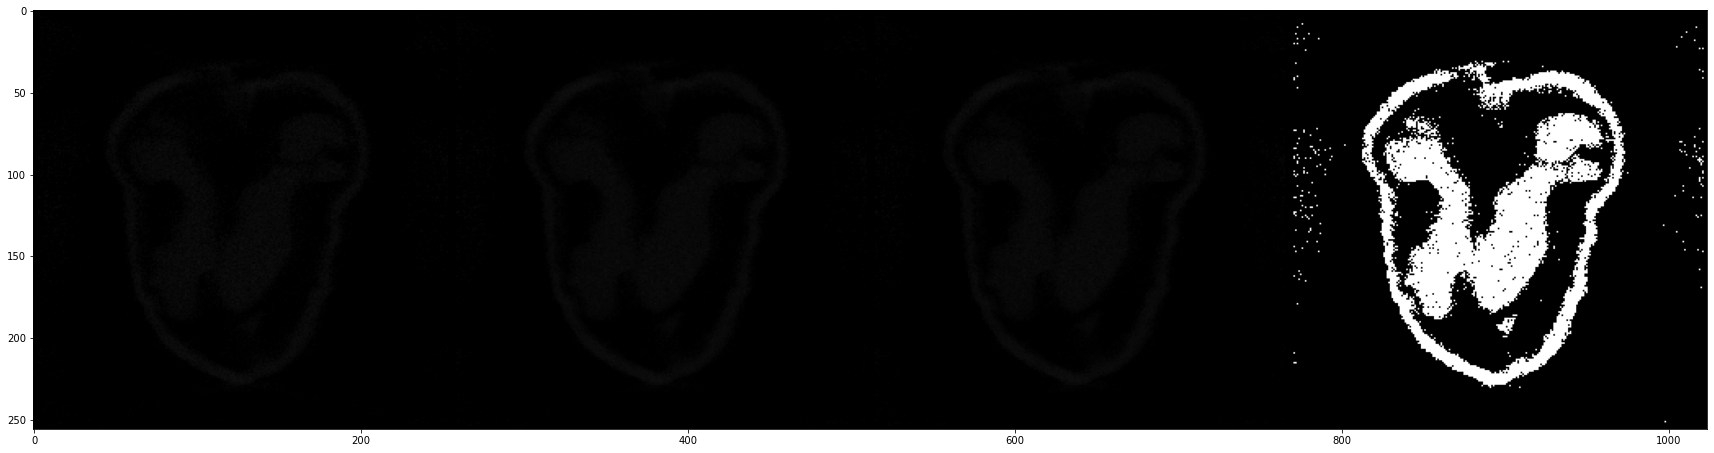

In [257]:
#print(output.shape)
plt.figure(figsize=(30,10))
index = random.randint(0, 7)
print(v[index])

temp            = y[index, 0]
thresh_min      = threshold_minimum(temp)
binary_adaptive = temp > thresh_min
y1              = binary_adaptive
        
#plt.imshow(np.concatenate([x[index, 0], output[index, 0], y[index, 0], 5*np.abs(output[index, 0]-y[index, 0])], axis=-1), cmap='gray')
plt.imshow(np.concatenate([x[index, 0], output[index, 0], y[index, 0], y1], axis=-1), cmap='gray')

(array([4.7863e+04, 4.0660e+03, 2.8330e+03, 2.8810e+03, 3.5430e+03,
        2.8830e+03, 1.1060e+03, 2.9600e+02, 6.0000e+01, 5.0000e+00]),
 array([0.        , 0.00658569, 0.01317139, 0.01975708, 0.02634277,
        0.03292847, 0.03951416, 0.04609985, 0.05268555, 0.05927124,
        0.06585693]),
 <a list of 10 Patch objects>)

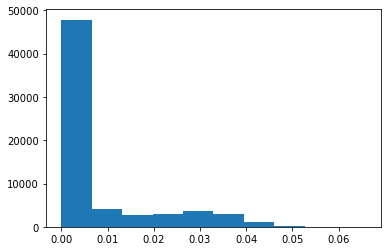

In [260]:
plt.hist(y[index, 0].flatten().astype('float'))

/media/pranjal/newdrive1/WalnutDataRecon/1_0.0135_50_huber.npy
/media/pranjal/newdrive1/WalnutDataRecon/1_0.0076_50_huber.npy
/media/pranjal/newdrive1/WalnutDataRecon/1_0_50_huber.npy
/media/pranjal/newdrive1/WalnutDataRecon/1_0.0425_50_huber.npy
/media/pranjal/newdrive1/WalnutDataRecon/1_0.0253_50_huber.npy
/media/pranjal/newdrive1/WalnutDataRecon/1_0.0384_50_huber.npy


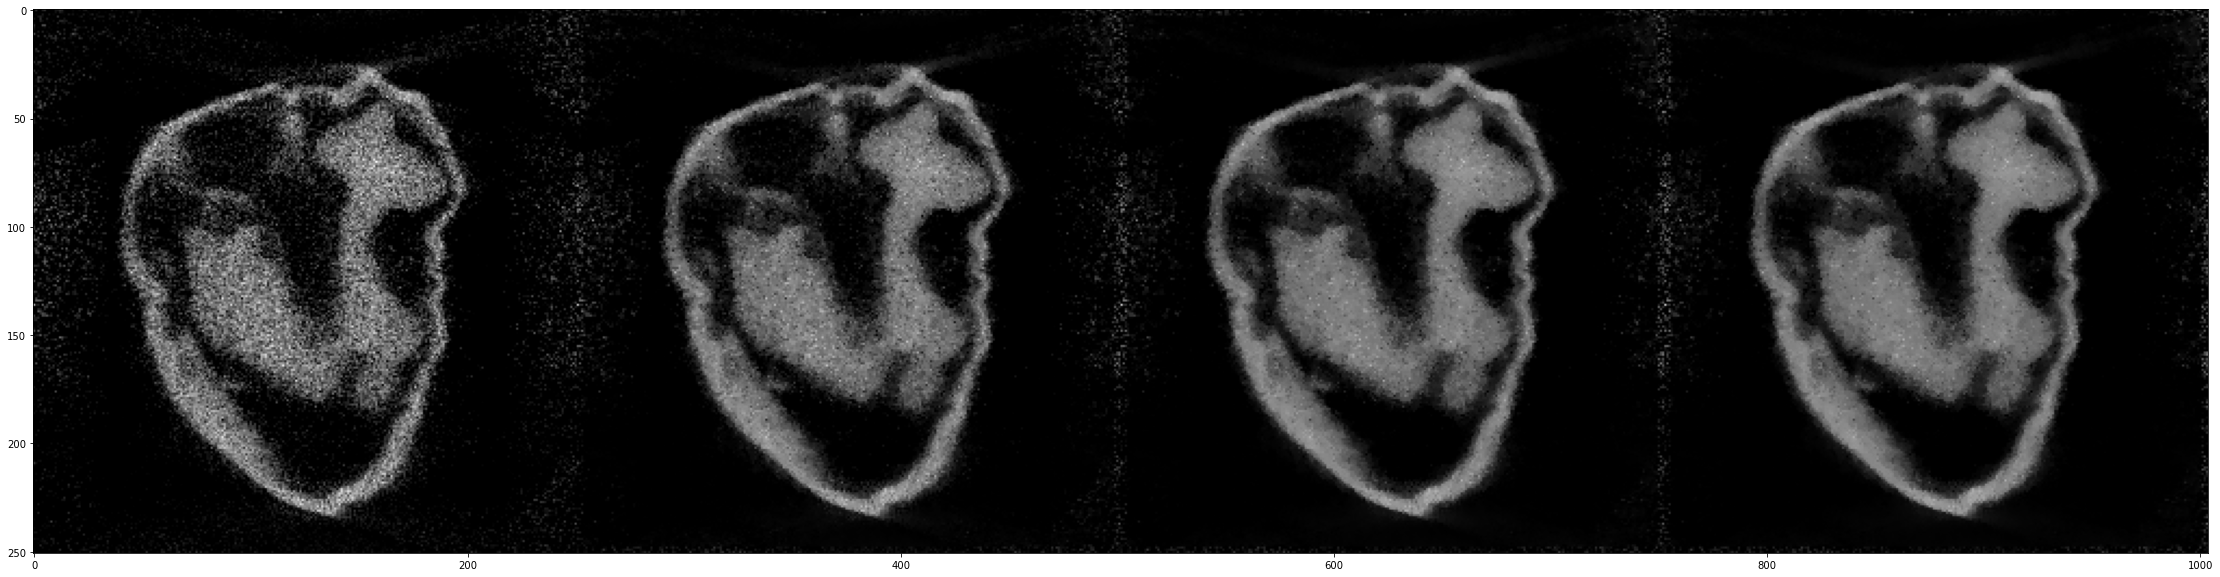

In [15]:
import numpy as np
import glob
import matplotlib.pyplot as plt

if 1:
    allfiles = glob.glob('/media/pranjal/newdrive1/WalnutDataRecon/1_*_50_huber.npy')
    for p in allfiles:
        print(p)

    a = np.load(allfiles[2])
    b = np.load(allfiles[1])
    c = np.load(allfiles[0])
    d = np.load(allfiles[4])
    e = np.load(allfiles[5])
    f = np.load(allfiles[3])

slice_index  = 140
plt.figure(figsize=(40,10))
plt.imshow(np.concatenate([a[:, slice_index, :],  d[:, slice_index, :], e[:, slice_index, :], f[:, slice_index, :]], axis=-1).astype('float32'), cmap='gray')
#plt.imshow(np.concatenate([a[:, slice_index, :],  d[:, slice_index, :],  f[:, slice_index, :]], axis=-1).astype('float32'), cmap='gray')

In [65]:
# Reconstruction Code for a given Walnut Case

# select the ID of the sample you want to reconstruct
walnut_id = 1
# select also the orbit you want to reconstruct the data from:
# 1 higher source position, 2 middle source position, 3 lower source position
orbit_id = 2
# define a sub-sampling factor in angular direction
# (all reference reconstructions are computed with full angular resolution)
angluar_sub_sampling = 10
# select of voxels per mm in one direction (higher = larger res)
# (all reference reconstructions are computed with 10)
voxel_per_mm = 5

# we enter here some intrinsic details of the dataset needed for our reconstruction scripts
# set the variable "data_path" to the path where the dataset is stored on your own workstation
data_path = '/media/pranjal/newdrive1/Walnuts/'
# set the variable "recon_path" to the path where you would like to store the
# reconstructions you compute
recon_path = '/media/pranjal/newdrive1/Walnut_recons/'

t = time.time();
print('load data', flush=True)

# we add the info about walnut and orbit ID
data_path_full = os.path.join(data_path, 'Walnut{}'.format(walnut_id), 'Projections', 'tubeV{}'.format(orbit_id))
projs_name = 'scan_{:06}.tif'
dark_name = 'di000000.tif'
flat_name = ['io000000.tif', 'io000001.tif']
vecs_name = 'scan_geom_corrected.geom'
projs_rows = 972
projs_cols = 768

# load the numpy array describing the scan geometry from file
vecs = np.loadtxt(os.path.join(data_path_full, vecs_name))
# get the positions we need; there are in fact 1201, but the last and first one come from the same angle
vecs       = vecs[range(0,1200, angluar_sub_sampling)]
# projection file indices, we need to read in the projection in reverse order due to the portrait mode acquision 
projs_idx  = range(1199,-1, -angluar_sub_sampling)

n_pro = vecs.shape[0]

# create the numpy array which will receive projection data from tiff files
projs = np.zeros((n_pro, projs_rows, projs_cols), dtype=np.float32)

# transformation to apply to each image, we need to get the image from
# the way the scanner reads it out into to way described in the projection
# geometry
trafo = lambda image : np.transpose(np.flipud(image))

# load flat-field and dark-fields
# there are two flat-field images (taken before and after acquisition), we simply average them
dark = trafo(imageio.imread(os.path.join(data_path_full, dark_name)))
flat = np.zeros((2, projs_rows, projs_cols), dtype=np.float32)

for i, fn in enumerate(flat_name):
    flat[i] = trafo(imageio.imread(os.path.join(data_path_full, fn)))
flat =  np.mean(flat,axis=0)

# load projection data
for i in range(n_pro):
    projs[i] = trafo(imageio.imread(os.path.join(data_path_full, projs_name.format(projs_idx[i]))))

print(np.round_(time.time() - t, 3), 'sec elapsed')

### pre-process data ###########################################################

t = time.time();
print('pre-process data', flush=True)
# subtract the dark field, divide by the flat field, and take the negative log to linearize the data according to the Beer-Lambert law
projs -= dark
projs /= (flat - dark)
np.log(projs, out=projs)
np.negative(projs, out=projs)
# permute data to ASTRA convention
projs = np.transpose(projs, (1,0,2))
projs = np.ascontiguousarray(projs)
print(np.round_(time.time() - t, 3), 'sec elapsed')

# [STAR] Testing GroundTruthReconstruction.py
import NesterovGradient

orbits_to_recon = [1,2,3]

#### load and pre-process data #################################################

t = time.time();
print('load and pre-process data', flush=True)

# we add the info about walnut
data_path_full = os.path.join(data_path, 'Walnut{}'.format(walnut_id), 'Projections')

projs_name = 'scan_{:06}.tif'
dark_name  = 'di000000.tif'
flat_name  = ['io000000.tif', 'io000001.tif']
vecs_name  = 'scan_geom_corrected.geom'
projs_rows = 972
projs_cols = 768

# Create the numpy array which will receive projection data from tiff files
projs = np.zeros((projs_rows, 0, projs_cols), dtype=np.float32)

# And create the numpy array receiving the motor positions read from the geometry file
vecs           = np.zeros((0, 12), dtype=np.float32)
nb_projs_orbit = len(range(0,1200, angluar_sub_sampling))
# projection file indices, we need to read in the projection in reverse order due to the portrait mode acquision 
projs_idx      = range(1199,-1, -angluar_sub_sampling)

# transformation to apply to each image, we need to get the image from
# the way the scanner reads it out into to way described in the projection
# geometry
trafo = lambda image : np.transpose(np.flipud(image))

# Loop over the subset of orbits we want to load at the same time
for orbit_id in tqdm(orbits_to_recon):
    orbit_data_path = os.path.join(data_path_full, 'tubeV{}'.format(orbit_id))


    # load the numpy array describing the scan geometry of the orbit from file
    vecs_orbit = np.loadtxt(os.path.join(orbit_data_path, vecs_name))
    
    # get the positions we need; there are in fact 1201, but the last and first one come from the same angle
    vecs = np.concatenate((vecs, vecs_orbit[range(0,1200, angluar_sub_sampling)]), axis=0)

    # load flat-field and dark-fields
    # there are two flat-field images (taken before and after acquisition), we simply average them
    dark = trafo(imageio.imread(os.path.join(orbit_data_path, dark_name)))
    flat = np.zeros((2, projs_rows, projs_cols), dtype=np.float32)
    for i, fn in enumerate(flat_name):
        flat[i] = trafo(imageio.imread(os.path.join(orbit_data_path, fn)))
    flat =  np.mean(flat,axis=0)

    # load projection data directly on the big projection array
    projs_orbit = np.zeros((nb_projs_orbit, projs_rows, projs_cols), dtype=np.float32)
    for i in range(nb_projs_orbit):
        projs_orbit[i] = trafo(imageio.imread(os.path.join(orbit_data_path, projs_name.format(projs_idx[i]))))

    # subtract the dark field, devide by the flat field, and take the negative log to linearize the data according to the Beer-Lambert law
    projs_orbit -= dark
    projs_orbit /= (flat - dark)
    
    noise       = random_noise(projs_orbit, mode="poisson")
    projs_orbit = projs_orbit + noise
    
    # take negative log
    np.log(projs_orbit, out=projs_orbit)
    np.negative(projs_orbit, out=projs_orbit)
    # permute data to ASTRA convention
    projs_orbit = np.transpose(projs_orbit, (1,0,2))

    # attach to projs
    projs = np.concatenate((projs, projs_orbit), axis=1)
    del projs_orbit

# from skimage.util import random_noise

#for k in range(360):
#    p     = projs[:, k, :]
#    #noise = random_noise(p, mode="poisson")
#    #noise = np.random.poisson(p)
#    #noise = np.random.normal(0, 0.1, p.shape)
#    #p     = p + noise
#    projs[:, k, :] = p
projs = np.ascontiguousarray(projs)

load data
0.229 sec elapsed
pre-process data
2.736 sec elapsed
load and pre-process data


100%|██████████| 3/3 [00:43<00:00, 14.52s/it]


In [51]:
W = astra.OpTomo(cfg_agd['ProjectorId'])
print(W)
print(W.FP)

<268738560x15813251 OpTomo with dtype=<class 'numpy.float32'>>
<bound method OpTomo.FP of <268738560x15813251 OpTomo with dtype=<class 'numpy.float32'>>>


In [24]:
### compute FDK reconstruction #################################################

t = time.time();
print('compute reconstruction', flush=True)

# size of the reconstruction volume in voxels
vol_sz  = 3*(50 * voxel_per_mm + 1,)
# size of a cubic voxel in mm
vox_sz  = 1/voxel_per_mm
# numpy array holding the reconstruction volume
vol_rec = np.zeros(vol_sz, dtype=np.float32)

# we need to specify the details of the reconstruction space to ASTRA
# this is done by a "volume geometry" type of structure, in the form of a Python dictionary
# by default, ASTRA assumes a voxel size of 1, we need to scale the reconstruction space here by the actual voxel size
vol_geom = astra.create_vol_geom(vol_sz)
vol_geom['option']['WindowMinX'] = vol_geom['option']['WindowMinX'] * vox_sz
vol_geom['option']['WindowMaxX'] = vol_geom['option']['WindowMaxX'] * vox_sz
vol_geom['option']['WindowMinY'] = vol_geom['option']['WindowMinY'] * vox_sz
vol_geom['option']['WindowMaxY'] = vol_geom['option']['WindowMaxY'] * vox_sz
vol_geom['option']['WindowMinZ'] = vol_geom['option']['WindowMinZ'] * vox_sz
vol_geom['option']['WindowMaxZ'] = vol_geom['option']['WindowMaxZ'] * vox_sz

# we need to specify the details of the projection space to ASTRA
# this is done by a "projection geometry" type of structure, in the form of a Python dictionary
proj_geom = astra.create_proj_geom('cone_vec', projs_rows, projs_cols, vecs)

# register both volume and projection geometries and arrays to ASTRA
#vol_id  = astra.data3d.link('-vol', vol_geom, vol_rec)
#proj_id = astra.data3d.link('-sino', proj_geom, projs)

vol_id  = astra.data3d.create('-vol', vol_geom)
proj_id = astra.data3d.create('-sino', proj_geom, projs)


#astra.create_projector('cuda3d', proj_geom, projs)

# finally, create an ASTRA configuration.
# this configuration dictionary setups an algorithm, a projection and a volume
# geometry and returns a ASTRA algorithm, which can be run on its own
# cfg_fdk = astra.astra_dict('FDK_CUDA')
# cfg_fdk['ProjectionDataId'] = proj_id
# cfg_fdk['ReconstructionDataId'] = vol_id
# cfg_fdk['option'] = {}
# cfg_fdk['option']['ShortScan'] = False
# alg_id = astra.algorithm.create(cfg_fdk)

compute reconstruction


In [ ]:
# finally, create an ASTRA configuration.
# this configuration dictionary setups an algorithm, a projection and a volume
# geometry and returns a ASTRA algorithm, which can be run on its own
cfg_fdk = astra.astra_dict('FDK_CUDA')
cfg_fdk['ProjectionDataId']     = proj_id
cfg_fdk['ReconstructionDataId'] = vol_id
cfg_fdk['option'] = {}
cfg_fdk['option']['ShortScan'] = False
alg_id = astra.algorithm.create(cfg_fdk)

# run FDK algorithm
astra.algorithm.run(alg_id, 1)

# release memory allocated by ASTRA structures
astra.algorithm.delete(alg_id)
astra.data3d.delete(proj_id)
astra.data3d.delete(vol_id)

print(np.round_(time.time() - t, 3), 'sec elapsed')

In [5]:
proj_geom        = astra.create_proj_geom('cone_vec', projs_rows, projs_cols, vecs)
proj_id          = astra.create_projector('cuda3d',   proj_geom, vol_geom)
W                = astra.OpTomo(proj_id)

In [16]:
print(proj_id)
W = astra.OpTomo(proj_id)

#W                = astra.OpTomo(proj_id)

7


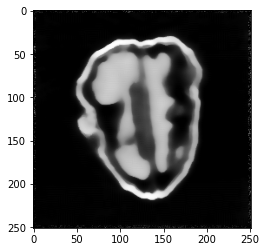

In [159]:
# 0.1
plt.imshow(vol_rec[:, 160, :], cmap='gray')

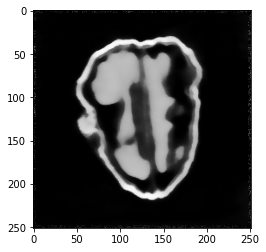

In [153]:
# 0.05
plt.imshow(vol_rec[:, 160, :], cmap='gray')

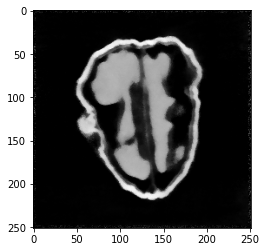

In [155]:
# 0.02
plt.imshow(vol_rec[:, 160, :], cmap='gray')

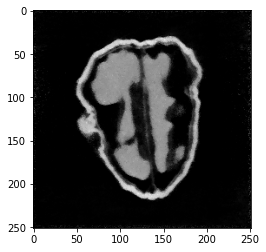

In [151]:
# 0.01
plt.imshow(vol_rec[:, 160, :], cmap='gray')

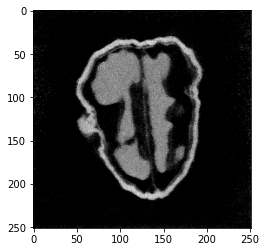

In [157]:
# 0.005
plt.imshow(vol_rec[:, 160, :], cmap='gray')

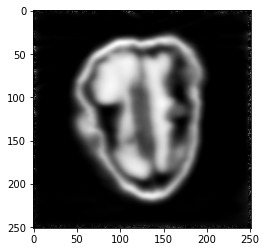

In [162]:
plt.imshow(vol_rec[:, 160, :], cmap='gray')

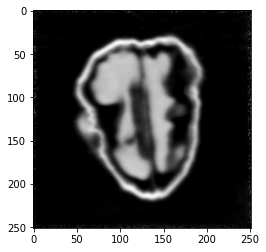

In [164]:
plt.imshow(vol_rec[:, 160, :], cmap='gray')

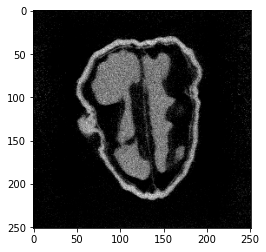

In [145]:
plt.imshow(vol_rec[:, 160, :], cmap='gray')

In [163]:
# Reconstruction Algorithm Code Step by Step

from numba import jit
from numba import njit, prange

@jit(nopython=True, parallel=True)
def my_divide(x, y):
    return np.divide(x, y)

@jit(nopython=True, parallel=True)
def my_add(x, y):
    return np.add(x, y)

@jit(nopython=True, parallel=True)
def my_mul(x, y):
    return np.multiply(x, y)

@njit(parallel=True)
def G_Huber_prior_sart(estbuf, delta):
    priorbuf = np.zeros(estbuf.shape)
    cent     = 1
    
    for ind_x in prange(3, estbuf.shape[0]-3):
        for ind_y in prange(3, estbuf.shape[1]-3):
            for ind_z in prange(3, estbuf.shape[2]-3):
                # For All the Voxels
                
                for ind_nr_z  in range(ind_z-1, ind_z+2):
                    for ind_nr_y in range(ind_y-1, ind_y+2):
                        for ind_nr_x in range(ind_x-1, ind_x+2):
                            distance = np.sqrt(float((ind_nr_x-ind_x)*(ind_nr_x-ind_x)+(ind_nr_y-ind_y)*(ind_nr_y-ind_y)+(ind_nr_z-ind_z)*(ind_nr_z-ind_z)))
                            
                            if (distance == 0.0):
                                distance = 1.0
                            
                            #if ( ind_nr_x<0  or ind_nr_y<0 or ind_nr_z<0 or ind_nr_x>(IMGSIZx-1) or ind_nr_y>(IMGSIZy-1) or ind_nr_z>(IMGSIZz-1) ):
                            #    ind_nr = int(ind_voxel)
                            #else:
                            #    ind_nr = int(ind_nr_x + ind_nr_y*IMGSIZx + ind_nr_z*IMGSIZx*IMGSIZy)
                            
                            diff        = estbuf[ind_x][ind_y][ind_z] - estbuf[ind_nr_x][ind_nr_y][ind_nr_z]
                            denominator = np.sqrt(1.0+(diff/delta)*(diff/delta))
                            priorbuf[ind_x][ind_y][ind_z] = priorbuf[ind_x][ind_y][ind_z] + diff
                            #priorbuf[ind_x][ind_y][ind_z] = priorbuf[ind_x][ind_y][ind_z] + (1.0/distance)*diff/denominator
    return priorbuf

proj_id      = astra.data3d.link('-sino', proj_geom, projs)
proj_arr     = astra.data3d.get_shared(proj_id)#.flatten()

proj_geom        = astra.create_proj_geom('cone_vec', projs_rows, projs_cols, vecs)
proj_id          = astra.create_projector('cuda3d',   proj_geom, vol_geom)
W                = astra.OpTomo(proj_id)

vol_rec      = np.zeros(vol_sz, dtype=np.float32)
only_ones_v  = np.ones(vol_rec.shape, dtype='float32')
only_ones_p  = np.ones(proj_arr.shape, dtype='float32')

delta = 0.001
niter = 100
beta  = 0.01

for j in range(0, niter):
    print("Iteration ", j)
    
    prior     = G_Huber_prior_sart(vol_rec, delta)
    
    p         = W.FP(vol_rec)
    diff      = proj_arr - p
    
    cost = np.square(diff)
    print("Cost is ", np.sum(cost), prior.shape, vol_rec.shape)
    
    temp_R    = W.FP(only_ones_v)
    diff      = my_divide(diff, temp_R)
    
    temp_back = W.BP(diff)
    temp_C    = W.BP(only_ones_p)
    vol       = my_divide(temp_back, temp_C)
    vol       = np.nan_to_num(vol)
    
    #vol[vol == np.nan] = 0
    
    vol      = np.reshape(vol, vol_rec.shape)
    vol_rec  = vol_rec + vol- beta*prior
    vol_rec[vol_rec < 0] = 0
    #print(temp_R.shape, temp_back.shape, temp_C.shape, p.shape, proj_arr.shape)
    #p = np.reshape(p, [detCols, 25, detRows])
    #print(p.shape, temp_back.shape)

#vol[vol == np.nan] = 0

Iteration  0
Cost is  43434828.0 (251, 251, 251) (251, 251, 251)
Iteration  1
Cost is  9987929.0 (251, 251, 251) (251, 251, 251)
Iteration  2
Cost is  7673575.5 (251, 251, 251) (251, 251, 251)
Iteration  3
Cost is  6347395.0 (251, 251, 251) (251, 251, 251)
Iteration  4
Cost is  5492666.5 (251, 251, 251) (251, 251, 251)
Iteration  5
Cost is  4915728.0 (251, 251, 251) (251, 251, 251)
Iteration  6
Cost is  4512524.5 (251, 251, 251) (251, 251, 251)
Iteration  7
Cost is  4218172.0 (251, 251, 251) (251, 251, 251)
Iteration  8
Cost is  3993442.5 (251, 251, 251) (251, 251, 251)
Iteration  9
Cost is  3815202.5 (251, 251, 251) (251, 251, 251)
Iteration  10
Cost is  3669376.2 (251, 251, 251) (251, 251, 251)
Iteration  11
Cost is  3547098.0 (251, 251, 251) (251, 251, 251)
Iteration  12
Cost is  3442587.2 (251, 251, 251) (251, 251, 251)
Iteration  13
Cost is  3351984.8 (251, 251, 251) (251, 251, 251)
Iteration  14
Cost is  3272555.0 (251, 251, 251) (251, 251, 251)
Iteration  15
Cost is  3202272.5 (

In [ ]:
# run FDK algorithm
astra.algorithm.run(alg_id, 1)

# release memory allocated by ASTRA structures
astra.algorithm.delete(alg_id)
astra.data3d.delete(proj_id)
astra.data3d.delete(vol_id)

print(np.round_(time.time() - t, 3), 'sec elapsed')



### save reconstruction ########################################################

t = time.time();
print('save results', flush=True)

# low level plotting
f, ax = plt.subplots(1, 3, sharex=False, sharey=False)
ax[0].imshow(vol_rec[vol_sz[0]//2,:,:])
ax[1].imshow(vol_rec[:,vol_sz[1]//2,:])
ax[2].imshow(vol_rec[:,:,vol_sz[2]//2])
f.tight_layout()

# construct full path for storing the results
recon_path_full = os.path.join(recon_path, 'Walnut{}'.format(walnut_id))

# create the directory in case it doesn't exist yet
if not os.path.exists(recon_path_full):
    os.makedirs(recon_path_full)

# Save every slice in  the volume as a separate tiff file
for i in range(vol_sz[0]):
    slice_path = os.path.join(recon_path_full, 'fdk_pos{}_ass{}_vmm{}_{:06}.tiff'.format(orbit_id,
                                  angluar_sub_sampling, voxel_per_mm, i))
    imageio.imwrite(slice_path, vol_rec[i,...])

print(np.round_(time.time() - t, 3), 'sec elapsed')


load and pre-process data


/home/pranjal/anaconda3/envs/tensorflow/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:2945: UserWarning: invalid tag value offset
  warnings.warn(str(e))


54.49 sec elapsed
compute reconstruction:
running power iteration to determine step size
plugin initialized.
running 50 iterations of Accelerated Gradient plugin.
iteration 0 / 50
iteration 10 / 50
iteration 20 / 50
iteration 30 / 50
iteration 40 / 50
119.815 sec elapsed
save results
0.813 sec elapsed


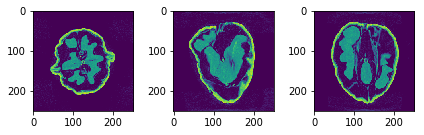

In [ ]:
for k in range(360):
    p     = projs[:, k, :]
    #noise = random_noise(p, mode="poisson")
    #noise = np.random.poisson(p)
    #noise = np.random.normal(0, 0.1, p.shape)
    p     = p + noise
    projs[:, k, :] = p
projs = np.ascontiguousarray(projs)

In [47]:
import SimpleITK as sitk

a1 = sitk.GetImageFromArray(vol_rec)
sitk.WriteImage(a1, 'test2.nii.gz')

In [40]:
#print(vol_rec.shape)

(251, 251, 251)


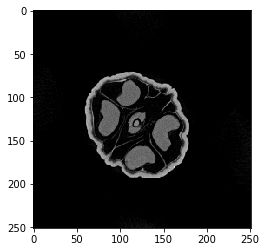

In [38]:
plt.imshow(vol_rec[170], cmap='gray')

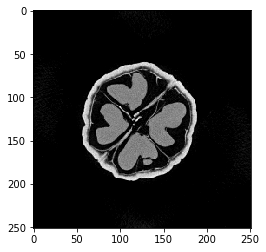

In [37]:
plt.imshow(vol_rec[70], cmap='gray')

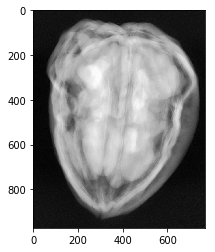

In [17]:
#print(projs.shape)
#t1 = copy.deepcopy(projs[:, 180, :])

plt.imshow(projs[:, 180, :], cmap='gray')